In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import folium
from folium import Choropleth

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer

from sklearn.ensemble import RandomForestRegressor

In [2]:
pd.set_option('display.max_columns', None)

df1 = pd.read_csv('../bin/data1.csv')
df2 = pd.read_csv('../bin/data2.csv')
df3 = pd.read_csv('../bin/data3.csv')

df = pd.concat([df1, df2, df3], ignore_index=True)

df.head()

provincia                               marca_modelo   fecha_matriculacion  \
0    Madrid               Detalles BMW Serie 3 (2018)   Matriculado: 11/2018   
1    Madrid                  Detalles FIAT 500 (2021)   Matriculado: 12/2021   
2    Madrid            Detalles NISSAN Qashqai (2017)   Matriculado: 04/2017   
3   Sevilla                Detalles OPEL Astra (2017)   Matriculado: 01/2017   
4    Madrid  Detalles MITSUBISHI Eclipse Cross (2022)   Matriculado: 07/2022   

   kilometraje   nombre_vendedor tipo_vendedor distintivo_ambiental  garantia  \
0        58000           RUTA 66   Profesional                    C  12 meses   
1        34680           RUTA 66   Profesional                  ECO  12 meses   
2        66933  AUTOMOTOR DURSAN   Profesional                    C  12 meses   
3       159000         Mules Car   Profesional                    C  12 meses   
4        62695    CLICARS MADRID   Profesional          0 EMISIONES  12 meses   

  precio_contado precio_nuevo          largo          ancho          alto  \
0          19990        37250  4633 mm Largo  1811 mm Ancho  1429 mm Alto   
1          12990        19300  3571 mm Largo  1627 mm Ancho  1488 mm Alto   
2          17390        26650  4377 mm Largo  1806 mm Ancho  1590 mm Alto   
3           8000        22425  4702 mm Largo  1809 mm Ancho  1499 mm Alto   
4          22990        44700  4545 mm Largo  1805 mm Ancho  1685 mm Alto   

                    capacidad_maletero              carroceria  \
0      Capacidad del maletero (l)480/0       CarroceríaBerlina   
1      Capacidad del maletero (l)185/0       CarroceríaBerlina   
2  Capacidad del maletero (l)430/1.598  CarroceríaTodo Terreno   
3  Capacidad del maletero (l)540/1.630  CarroceríaStationwagon   
4  Capacidad del maletero (l)404/1.153  CarroceríaTodo Terreno   

          num_plazas                batalla  \
0  Número de plazas5  Batalla (mm)\r\n2.810   
1  Número de plazas4  Batalla (mm)\r\n2.300   
2  Número de plazas5  Batalla (mm)\r\n2.646   
3  Número de plazas5  Batalla (mm)\r\n2.662   
4  Número de plazas5  Batalla (mm)\r\n2.670   

                                  peso         num_puertas  \
0  Peso/Masa max. autorizado (kg)2.045  Número de puertas4   
1  Peso/Masa max. autorizado (kg)1.055  Número de puertas3   
2  Peso/Masa max. autorizado (kg)1.910  Número de puertas5   
3  Peso/Masa max. autorizado (kg)1.985  Número de puertas5   
4  Peso/Masa max. autorizado (kg)2.425  Número de puertas5   

                      consumo_medio                        consumo_carretera  \
0  Consumo medio 4,50 litros/100 km  Consumo en carretera 4,00 litros/100 km   
1  Consumo medio 0,00 litros/100 km  Consumo en carretera 0,00 litros/100 km   
2  Consumo medio 3,80 litros/100 km  Consumo en carretera 3,60 litros/100 km   
3  Consumo medio 3,60 litros/100 km  Consumo en carretera 3,30 litros/100 km   
4  Consumo medio 0,00 litros/100 km  Consumo en carretera 0,00 litros/100 km   

                      consumo_urbano                  CO2  \
0  Consumo urbano 5,30 litros/100 km  CO2 (g/km) 118 g/km   
1  Consumo urbano 0,00 litros/100 km    CO2 (g/km) - g/km   
2  Consumo urbano 4,20 litros/100 km  CO2 (g/km) 103 g/km   
3  Consumo urbano 4,20 litros/100 km   CO2 (g/km) 99 g/km   
4  Consumo urbano 0,00 litros/100 km    CO2 (g/km) - g/km   

                                   deposito  \
0  Depósito de combustible (l) 57,00 litros   
1  Depósito de combustible (l) 35,00 litros   
2  Depósito de combustible (l) 55,00 litros   
3  Depósito de combustible (l) 48,00 litros   
4  Depósito de combustible (l) 43,00 litros   

                                  combustible                    cilindros  \
0                          Combustible Diesel  Nº de cilindros 4 cilindros   
1                        Combustible Gasolina  Nº de cilindros 3 cilindros   
2                          Combustible Diesel  Nº de cilindros 4 cilindros   
3                          Combustible Diesel  Nº de cilindros 4 cilindros 

In [3]:
df.shape

(34101, 36)

In [4]:
df.columns

Index(['provincia', 'marca_modelo', 'fecha_matriculacion', 'kilometraje',
       'nombre_vendedor', 'tipo_vendedor', 'distintivo_ambiental', 'garantia',
       'precio_contado', 'precio_nuevo', 'largo', 'ancho', 'alto',
       'capacidad_maletero', 'carroceria', 'num_plazas', 'batalla', 'peso',
       'num_puertas', 'consumo_medio', 'consumo_carretera', 'consumo_urbano',
       'CO2', 'deposito', 'combustible', 'cilindros', 'cilindrada',
       'sobrealimentacion', 'tipo_cambio', 'traccion', 'num_marchas',
       'potencia_kw', 'potencia_cv', 'par', 'velocidad_max', 'aceleracion'],
      dtype='object')

In [5]:
df['kilometraje'].dtype == 'int64'

True

In [6]:
nan_percentage = df.isna().mean()*100
print(nan_percentage)

provincia                0.000000
marca_modelo             0.000000
fecha_matriculacion      0.000000
kilometraje              0.000000
nombre_vendedor          0.000000
tipo_vendedor            0.000000
distintivo_ambiental     0.000000
garantia                 0.000000
precio_contado           0.000000
precio_nuevo             0.000000
largo                   29.400897
ancho                   29.400897
alto                    29.400897
capacidad_maletero      29.491804
carroceria               0.988241
num_plazas              26.345268
batalla                 29.491804
peso                    21.638662
num_puertas              0.988241
consumo_medio           17.741415
consumo_carretera       21.600540
consumo_urbano          21.600540
CO2                     29.562183
deposito                29.400897
combustible              0.897334
cilindros               29.400897
cilindrada              15.583121
sobrealimentacion       29.400897
tipo_cambio              0.897334
traccion      

In [7]:
df['tipo_cambio'].unique()

array(['Tipo de transmisión Manual',
       'Tipo de transmisión Directo, sin caja de cambios', 'Automático',
       'Tipo de transmisión Automática secuencial',
       'Tipo de transmisión Automática continua', 'Manual',
       'Tipo de transmisión Manual automatizada',
       'Tipo de transmisión Automática', nan, 'no disponible', '-'],
      dtype=object)

In [8]:
#Hay nans que se toman como floats. Lo convierto a "no disponible"
df['tipo_cambio'] = df['tipo_cambio'].fillna("no disponible")

#No sé qué es manual automatizada, si queremos que sea manual hay que poner la lambda al revés
df['tipo_cambio'] = df['tipo_cambio'].apply(lambda x: 'Automático' if 'Automátic' in x else 'Manual')

In [9]:
df['carroceria'].unique()

array(['CarroceríaBerlina', 'CarroceríaTodo Terreno',
       'CarroceríaStationwagon', '4x4, SUV o pickup',
       'Berlina mediana o grande', 'CarroceríaMonovolumen', 'Pequeño',
       'Deportivo o coupé', 'CarroceríaRoadster', 'CarroceríaCoupe',
       'Descapotable o convertible', 'CarroceríaConvertible', 'Familiar',
       'Monovolumen', nan, 'Número de puertas:  4 Puertas',
       'Número de puertas:  5 Puertas', 'Número de puertas:  2 Puertas',
       'CarroceríaTarga', 'CarroceríaCombi'], dtype=object)

In [10]:
df["carroceria"] = df["carroceria"].str.replace("Carrocería","")

In [11]:
df["combustible"] = df["combustible"].str.replace("combustible ","").str.replace("Combustible ","")

In [12]:
df['fecha_matriculacion'] = df['fecha_matriculacion'].str.split("Matriculado: ").str[1]

def limpiar_fecha(fecha):
    try:
        mes, ano = fecha.split('/')
        return int(mes), int(ano)
    except:
        return np.nan, int(fecha)

df[['mes_matriculacion', 'ano_matriculacion']] = df['fecha_matriculacion'].apply(lambda x: pd.Series(limpiar_fecha(x)))

In [13]:
df = df.drop(columns=['fecha_matriculacion'])

In [14]:
df['mes_matriculacion'] = df['mes_matriculacion'].fillna(0).astype('int64')
df['ano_matriculacion'] = df['ano_matriculacion'].fillna(0).astype('int64')

In [15]:
df = df[df["tipo_vendedor"] == "Profesional"]
df = df.drop(columns=['tipo_vendedor'])

In [16]:
df["garantia"] = df["garantia"].str.split(' ').str[0].replace("Sí",np.nan).replace("No",0).astype(float)

In [17]:
df["precio_contado"] = pd.to_numeric(df["precio_contado"], errors='coerce')

In [18]:
df["precio_nuevo"] = pd.to_numeric(df["precio_nuevo"], errors='coerce')

In [19]:
df['largo'] = pd.to_numeric(df['largo'].str.extract('(\d+\.?\d*)')[0], errors='coerce')
df['ancho'] = pd.to_numeric(df['ancho'].str.extract('(\d+\.?\d*)')[0], errors='coerce')
df['alto'] = pd.to_numeric(df['alto'].str.extract('(\d+\.?\d*)')[0], errors='coerce')

In [20]:
df['capacidad_maletero'] = pd.to_numeric(df['capacidad_maletero'].str.extract(r'(\d+\.?\d*)')[0], errors='coerce')

In [21]:
df["num_plazas"] = df["num_plazas"].str.split("s").str[1].astype(float)

In [22]:
df["batalla"] = df["batalla"].str.extract(r'(\d+\.\d+)').replace(".","").astype(float)

In [23]:
df["peso"] = df["peso"].str.extract(r'(\d+\.\d+)').replace(".","").astype(float)

In [24]:
df["num_puertas"] = df["num_puertas"].str.extract(r'(\d+)').astype("Int64")

In [25]:
df["consumo_medio"] = df["consumo_medio"].str.extract(r'(\d+,\d+)').replace(',', '.', regex=True).astype(float)

In [26]:
df["consumo_carretera"] = df["consumo_carretera"].str.extract(r'(\d+,\d+)').replace(',', '.', regex=True).astype(float)

In [27]:
df["consumo_urbano"] = df["consumo_urbano"].str.extract(r'(\d+,\d+)').replace(',', '.', regex=True).astype(float)

In [28]:
df["co2"] = df["CO2"].str.extract(r'(\d{1,3})(?= g/km)')[0].astype(float)

In [29]:
df["deposito"] = df["deposito"].str.extract(r'(\d+,\d+)').replace(',', '.', regex=True).astype(float)

In [30]:
df["num_cilindros"] = df["cilindros"].str.extract(r'(\d+)').astype(float)

In [31]:
df["cilindrada"] = df["cilindrada"].str.extract(r'(\d+,\d+|\d+\.\d+)').replace(',', '.', regex=True).astype(float)

In [32]:
df["num_marchas"] = df["num_marchas"].str.extract(r'(\d+)').astype(float)

In [33]:
df["potencia_kw"] = df["potencia_kw"].str.extract(r'(\d+)').astype(float)

In [34]:
df["potencia_cv"] = df["potencia_cv"].str.extract(r'(\d+)').astype(float)

In [35]:
df["par"] = df["par"].str.extract(r'(\d+)').astype(float)

In [36]:
df["velocidad_max"] = df["velocidad_max"].str.extract(r'(\d+)').astype(float)

In [37]:
df["aceleracion"] = df["aceleracion"].str.extract(r'(\d+,\d+|\d+\.\d+)')[0].str.replace(",", ".").astype(float)

In [38]:
df['id_sobrealimentacion'] = df['sobrealimentacion'].apply(lambda x: x.replace('Sobrealimentación', '') if pd.notna(x) else x)

In [39]:
df.head()

provincia                               marca_modelo  kilometraje  \
0    Madrid               Detalles BMW Serie 3 (2018)         58000   
1    Madrid                  Detalles FIAT 500 (2021)         34680   
2    Madrid            Detalles NISSAN Qashqai (2017)         66933   
3   Sevilla                Detalles OPEL Astra (2017)        159000   
4    Madrid  Detalles MITSUBISHI Eclipse Cross (2022)         62695   

    nombre_vendedor distintivo_ambiental  garantia  precio_contado  \
0           RUTA 66                    C      12.0         19990.0   
1           RUTA 66                  ECO      12.0         12990.0   
2  AUTOMOTOR DURSAN                    C      12.0         17390.0   
3         Mules Car                    C      12.0          8000.0   
4    CLICARS MADRID          0 EMISIONES      12.0         22990.0   

   precio_nuevo   largo   ancho    alto  capacidad_maletero    carroceria  \
0       37250.0  4633.0  1811.0  1429.0               480.0       Berlina   
1       19300.0  3571.0  1627.0  1488.0               185.0       Berlina   
2       26650.0  4377.0  1806.0  1590.0               430.0  Todo Terreno   
3       22425.0  4702.0  1809.0  1499.0               540.0  Stationwagon   
4       44700.0  4545.0  1805.0  1685.0               404.0  Todo Terreno   

   num_plazas  batalla   peso  num_puertas  consumo_medio  consumo_carretera  \
0         5.0    2.810  2.045            4            4.5                4.0   
1         4.0    2.300  1.055            3            0.0                0.0   
2         5.0    2.646  1.910            5            3.8                3.6   
3         5.0    2.662  1.985            5            3.6                3.3   
4         5.0    2.670  2.425            5            0.0                0.0   

   consumo_urbano                  CO2  deposito  \
0             5.3  CO2 (g/km) 118 g/km      57.0   
1             0.0    CO2 (g/km) - g/km      35.0   
2             4.2  CO2 (g/km) 103 g/km      55.0   
3             4.2   CO2 (g/km) 99 g/km      48.0   
4             0.0    CO2 (g/km) - g/km      43.0   

                      combustible                    cilindros  cilindrada  \
0                          Diesel  Nº de cilindros 4 cilindros       1.995   
1                        Gasolina  Nº de cilindros 3 cilindros         NaN   
2                          Diesel  Nº de cilindros 4 cilindros       1.461   
3                          Diesel  Nº de cilindros 4 cilindros       1.598   
4  Gasolina y corriente eléctrica  Nº de cilindros 4 cilindros       2.360   

                               sobrealimentacion tipo_cambio  \
0  Sobrealimentación Turbo de geometría variable      Manual   
1                        Sobrealimentación Turbo      Manual   
2                        Sobrealimentación Turbo      Manual   
3                        Sobrealimentación Turbo      Manual   
4                        Sobrealimentación Turbo      Manual   

                                         traccion  num_marchas  potencia_kw  \
0                        TracciónTracción trasera          6.0        110.0   
1                      TracciónTracción delantera          6.0         52.0   
2                      TracciónTracción delantera          6.0         81.0   
3                      TracciónTracción delantera          6.0         81.0   
4  TracciónTodo terreno tracción total permanente          1.0        138.0   

   potencia_cv    par  velocidad_max  aceleracion  mes_matriculacion  \
0        150.0  320.0          215.0          8.7                 11   
1         70.0   92.0          167.0         13.8                 12   
2        110.0  260.0          182.0         11.9                  4   
3        110.0  300.0          195.0         11.4                  1   
4        188.0  193.0          162.0         10.9                  7   

   ano_matriculacion    co2  num_cilindros          id_sobrealimentacion  
0               2018  118.0            4.0   Turbo de geomet

In [40]:
marca_listado = pd.read_csv('../bin/listado_marcas.csv')

lista_marcas = [marca.upper() for marca in marca_listado['nombre_marca'].tolist()]

df['marca_modelo'] = df['marca_modelo'].fillna('').str.replace("Detalles ", "").str.strip().str.upper()

df['marca'] = df['marca_modelo'].apply(lambda x: next((marca for marca in lista_marcas if marca in x), np.nan))
df['modelo'] = df.apply(lambda x: x['marca_modelo'].replace(x['marca'], "").strip(" ()") if pd.notnull(x['marca']) else x['marca_modelo'], axis=1)


In [41]:
df = df.drop(columns=['marca_modelo', 'CO2', 'cilindros', 'sobrealimentacion'])

In [42]:
df.rename(columns={'distintivo_ambiental': 'id_distintivo_ambiental'
                  , 'marca': 'id_marca'
                  , 'modelo': 'id_modelo'
                  , 'nombre_vendedor': 'id_concesionario'
                  , 'provincia': 'id_provincia'
                  , 'carroceria': 'id_carroceria'}, inplace=True)

In [43]:
df.shape

(34062, 37)

In [44]:
df.dtypes

id_provincia                object
kilometraje                  int64
id_concesionario            object
id_distintivo_ambiental     object
garantia                   float64
precio_contado             float64
precio_nuevo               float64
largo                      float64
ancho                      float64
alto                       float64
capacidad_maletero         float64
id_carroceria               object
num_plazas                 float64
batalla                    float64
peso                       float64
num_puertas                  Int64
consumo_medio              float64
consumo_carretera          float64
consumo_urbano             float64
deposito                   float64
combustible                 object
cilindrada                 float64
tipo_cambio                 object
traccion                    object
num_marchas                float64
potencia_kw                float64
potencia_cv                float64
par                        float64
velocidad_max       

In [45]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
continuous_columns = df.select_dtypes(include=['Int64', 'float', 'int']).columns


def metricas (df, columna):
    
    if columna in categorical_columns:
        
        plt.figure(figsize=(15, 6))
        
        plt.subplot(1, 2, 1)
        sns.countplot(data=df, x=columna)
        plt.title(f'Distribución de {columna}')
        plt.xticks(rotation=45, ha='right')
        
        plt.subplot(1, 2, 2)
        sns.boxplot(data=df, x=columna, y='precio_contado')
        plt.title(f'Boxplot de {columna} con precio')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.xticks(rotation=45, ha='right')
        plt.show()
    
    elif columna in continuous_columns:

        plt.figure(figsize=(15, 6))
        
        plt.subplot(1, 3, 1)
        sns.histplot(df[columna], kde=True)
        plt.title(f'Histograma de {columna}')
        
        
        plt.subplot(1, 3, 2)
        sns.boxplot(x=df[columna])
        plt.title(f'Boxplot de {columna}')
        plt.xticks(rotation=45, ha='right')
        
        plt.subplot(1, 3, 3)
        sns.scatterplot(x=df[columna], y=df['precio_contado'])
        plt.title(f'Scatterplot de {columna} con precio')
        plt.tight_layout()
        plt.xticks(rotation=45, ha='right')
        plt.show()

In [46]:
categorical_columns

Index(['id_provincia', 'id_concesionario', 'id_distintivo_ambiental',
       'id_carroceria', 'combustible', 'tipo_cambio', 'traccion',
       'id_sobrealimentacion', 'id_marca', 'id_modelo'],
      dtype='object')

In [47]:
len(categorical_columns)

10

In [48]:
continuous_columns

Index(['kilometraje', 'garantia', 'precio_contado', 'precio_nuevo', 'largo',
       'ancho', 'alto', 'capacidad_maletero', 'num_plazas', 'batalla', 'peso',
       'num_puertas', 'consumo_medio', 'consumo_carretera', 'consumo_urbano',
       'deposito', 'cilindrada', 'num_marchas', 'potencia_kw', 'potencia_cv',
       'par', 'velocidad_max', 'aceleracion', 'mes_matriculacion',
       'ano_matriculacion', 'co2', 'num_cilindros'],
      dtype='object')

In [49]:
len(continuous_columns)

27

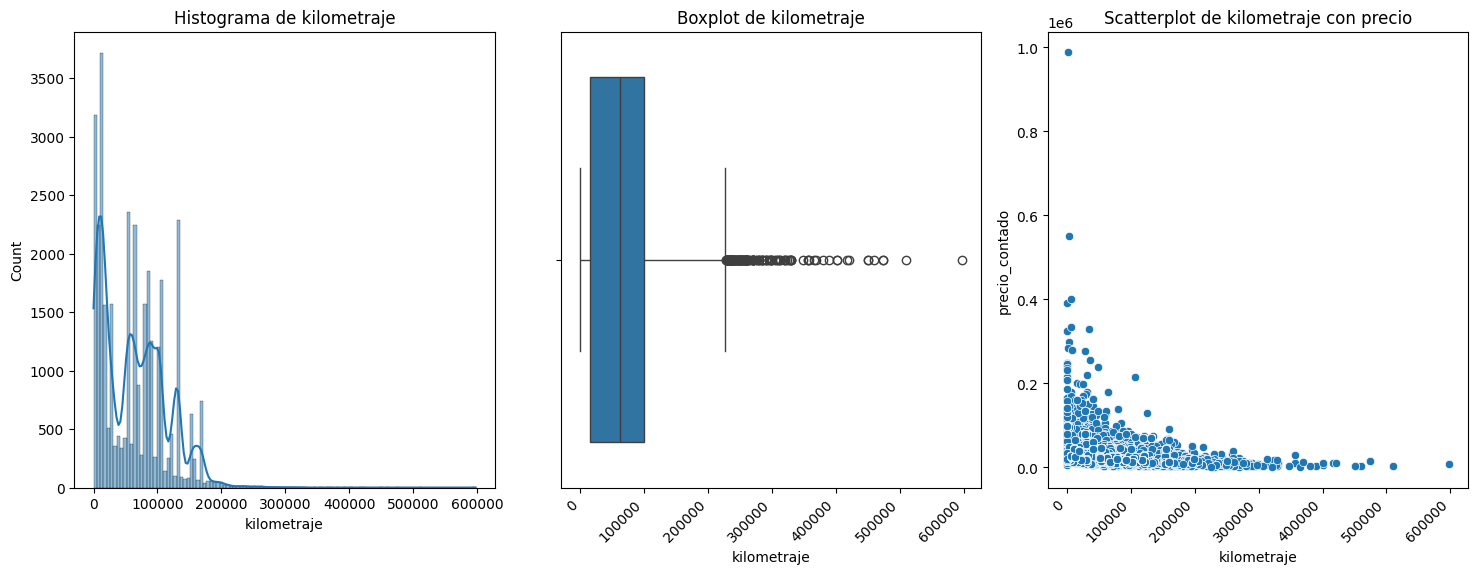

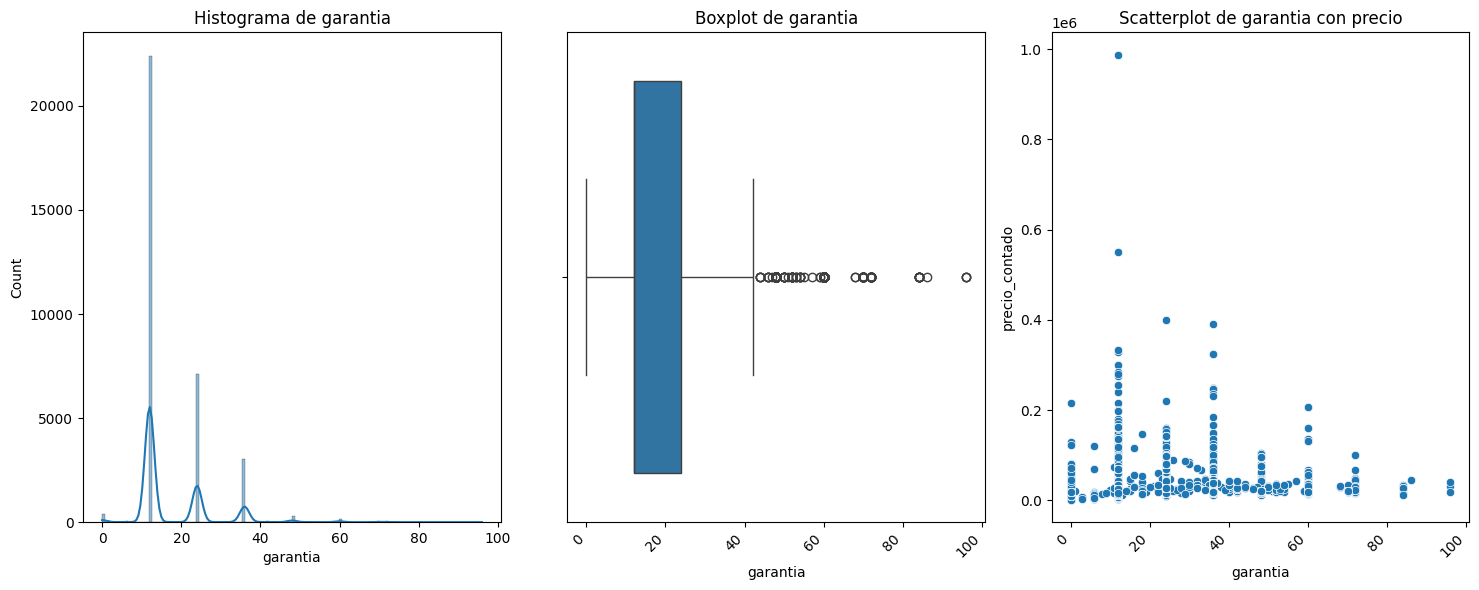

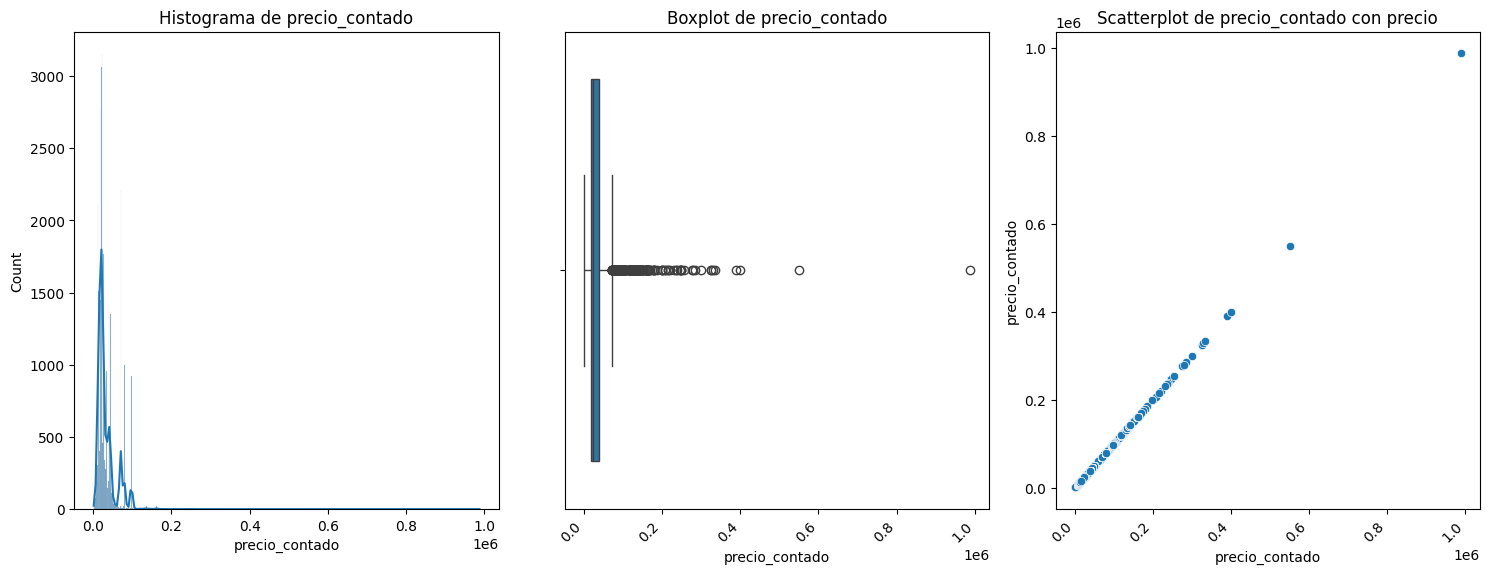

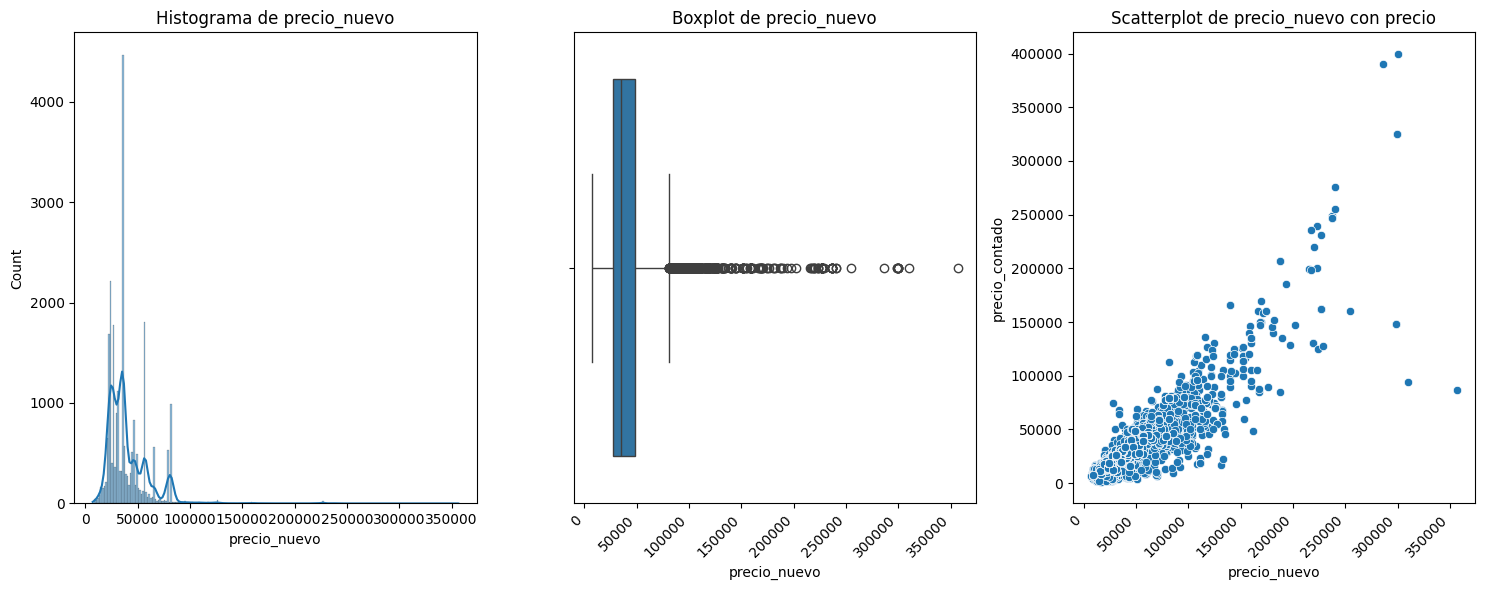

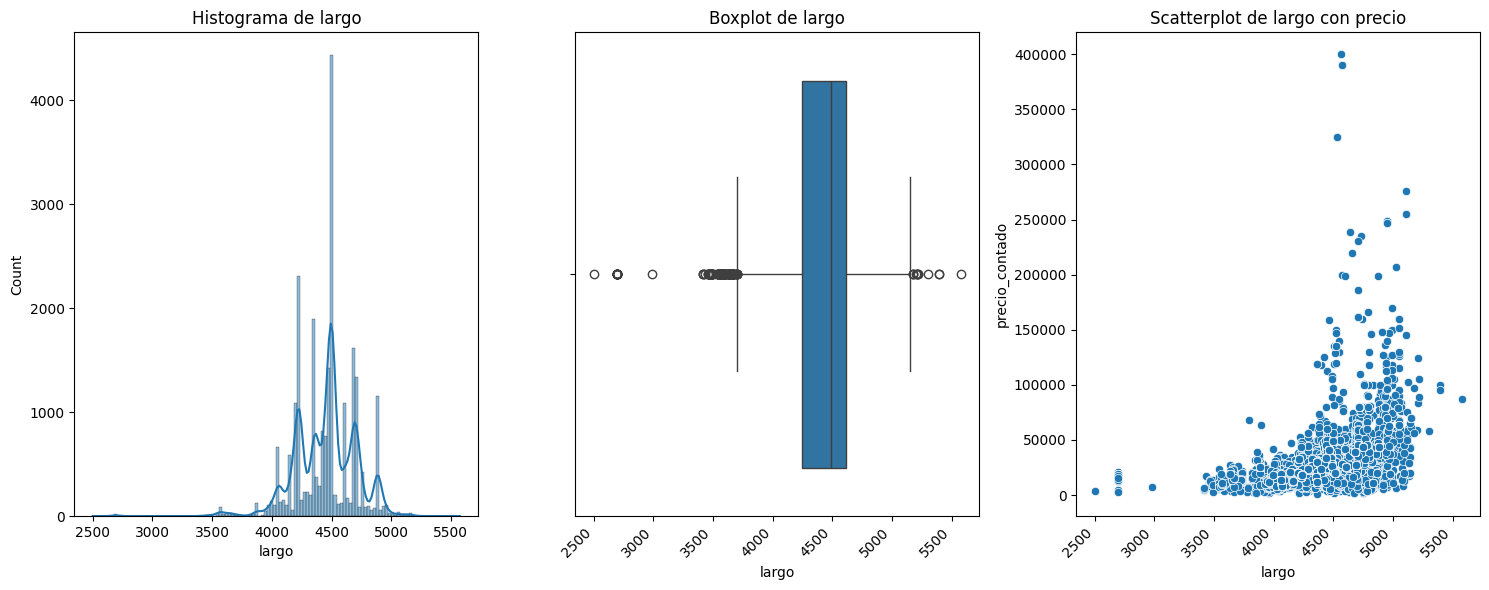

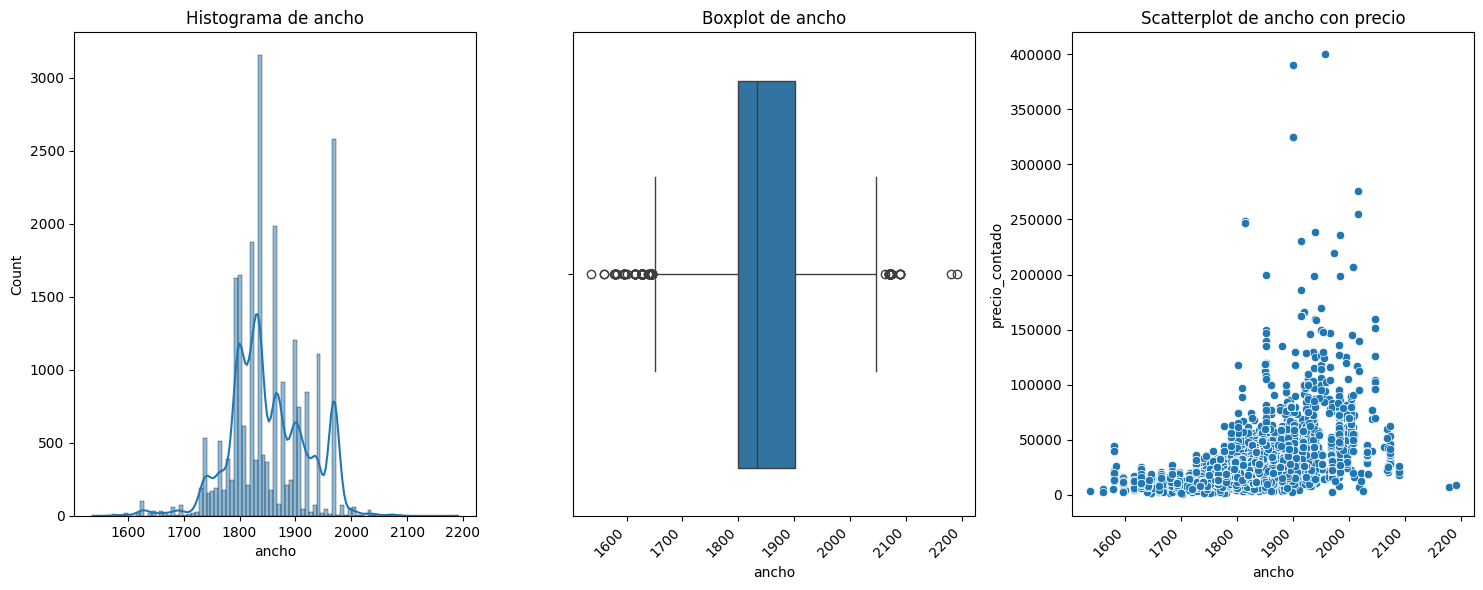

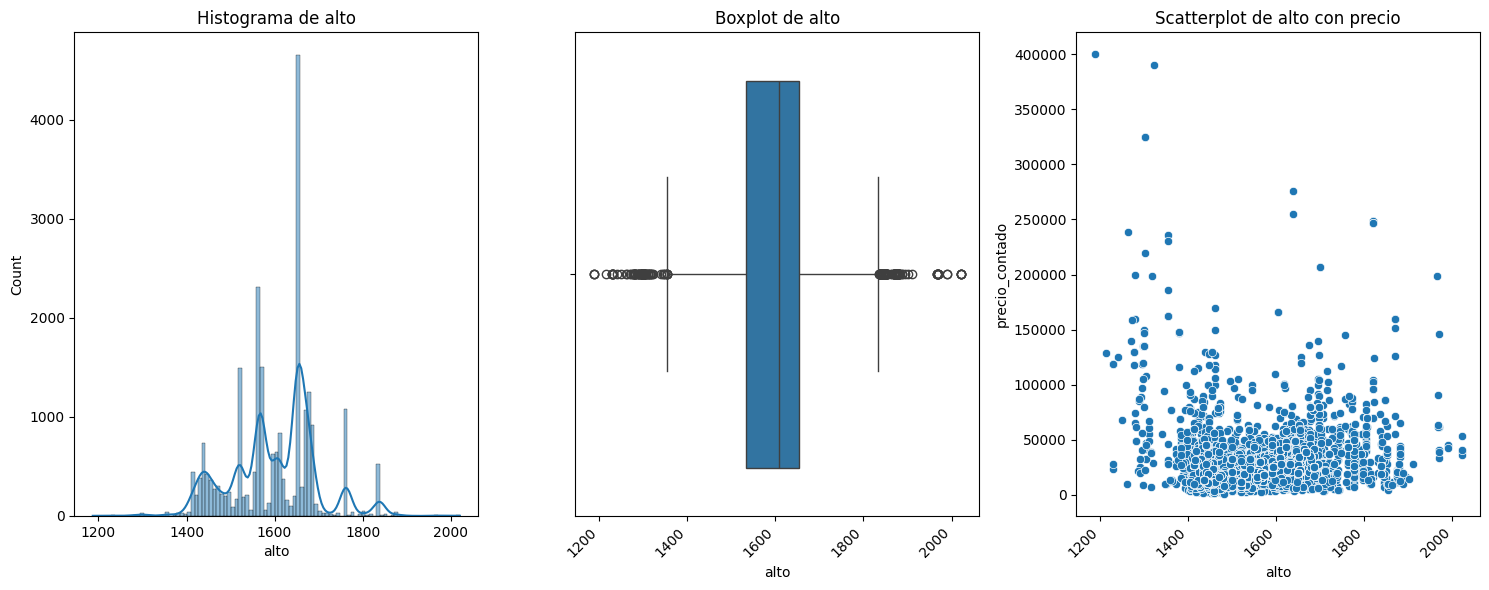

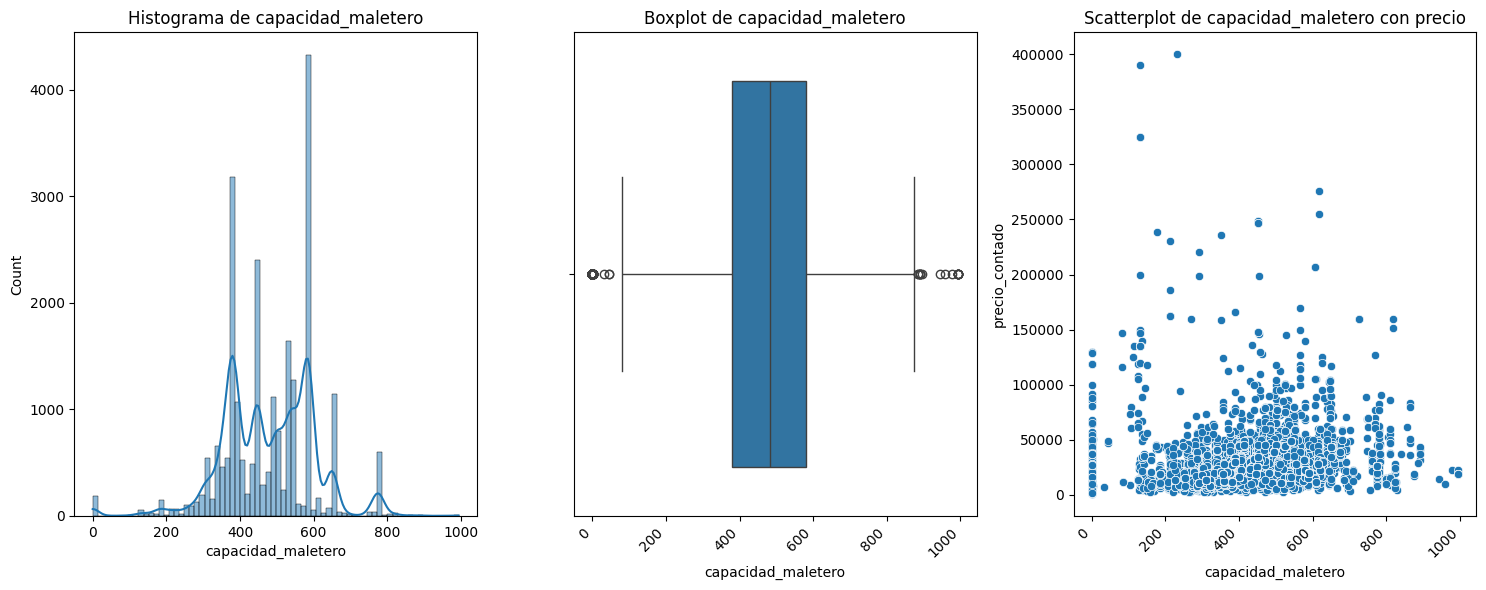

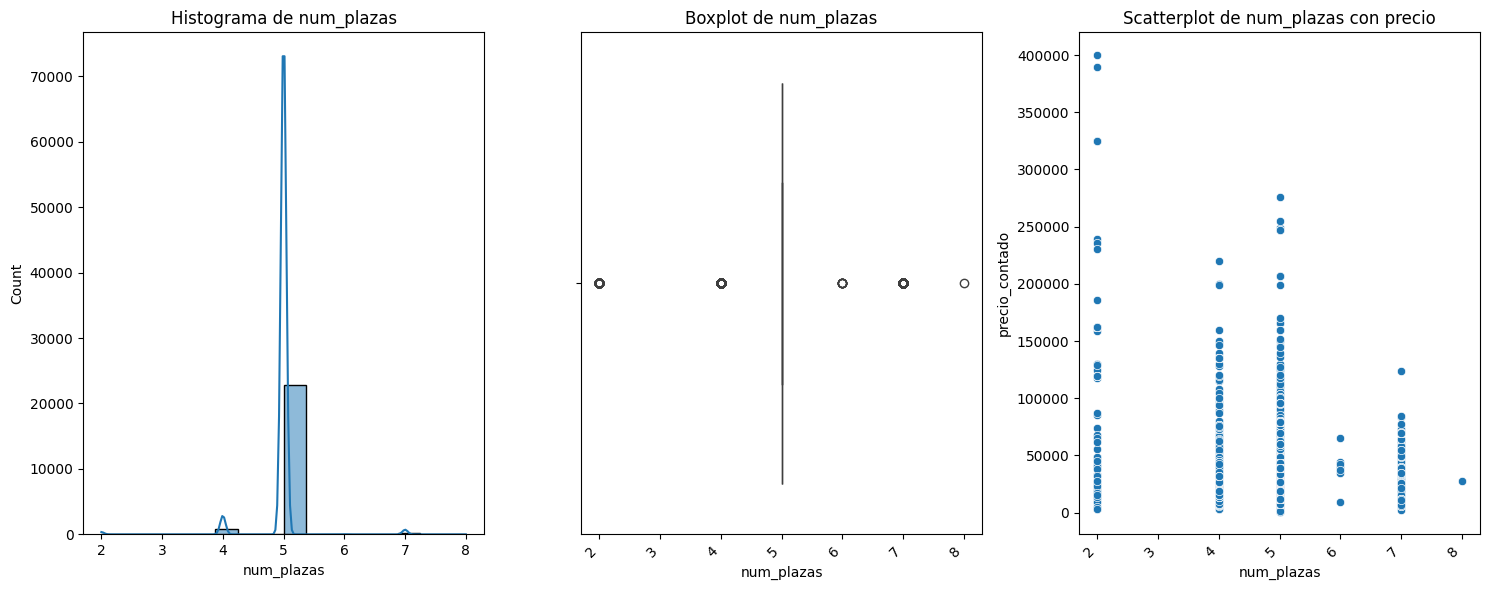

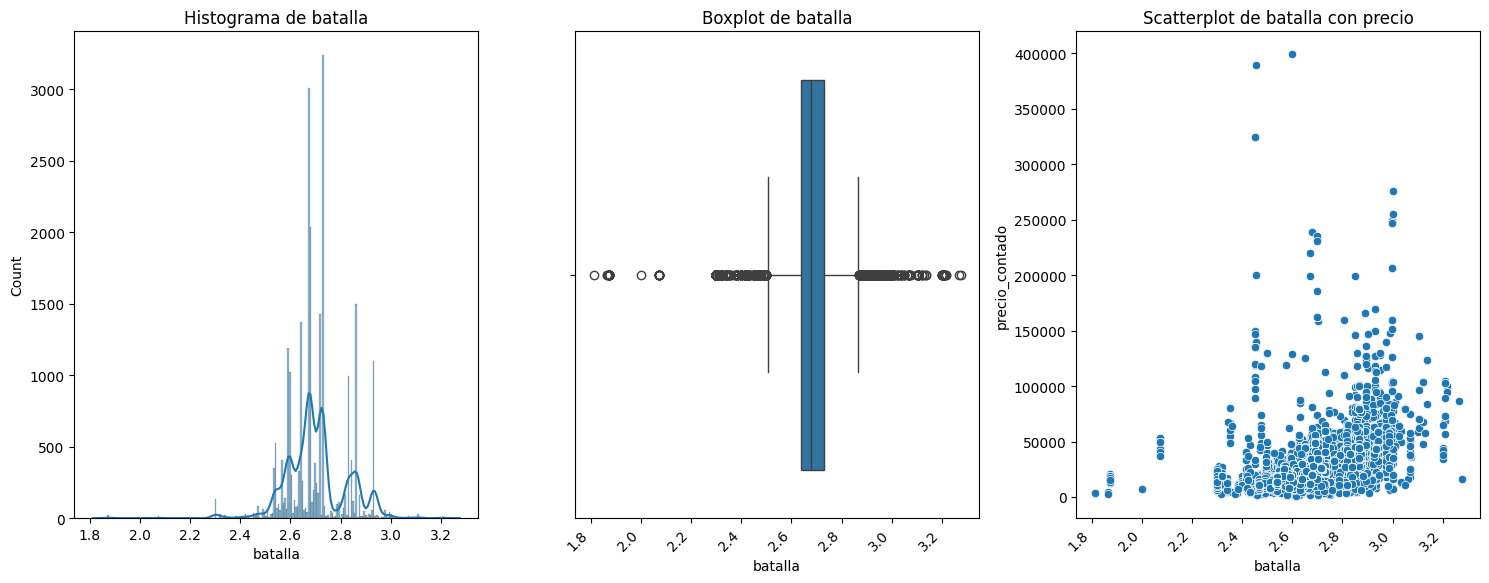

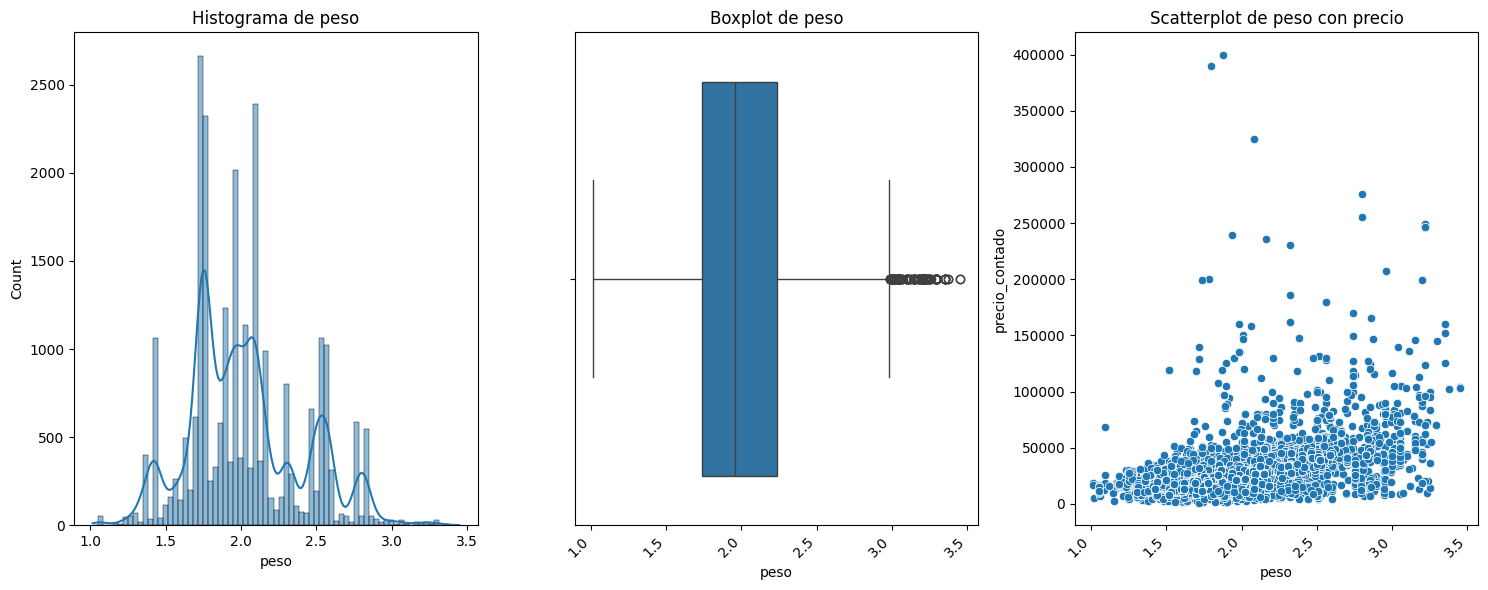

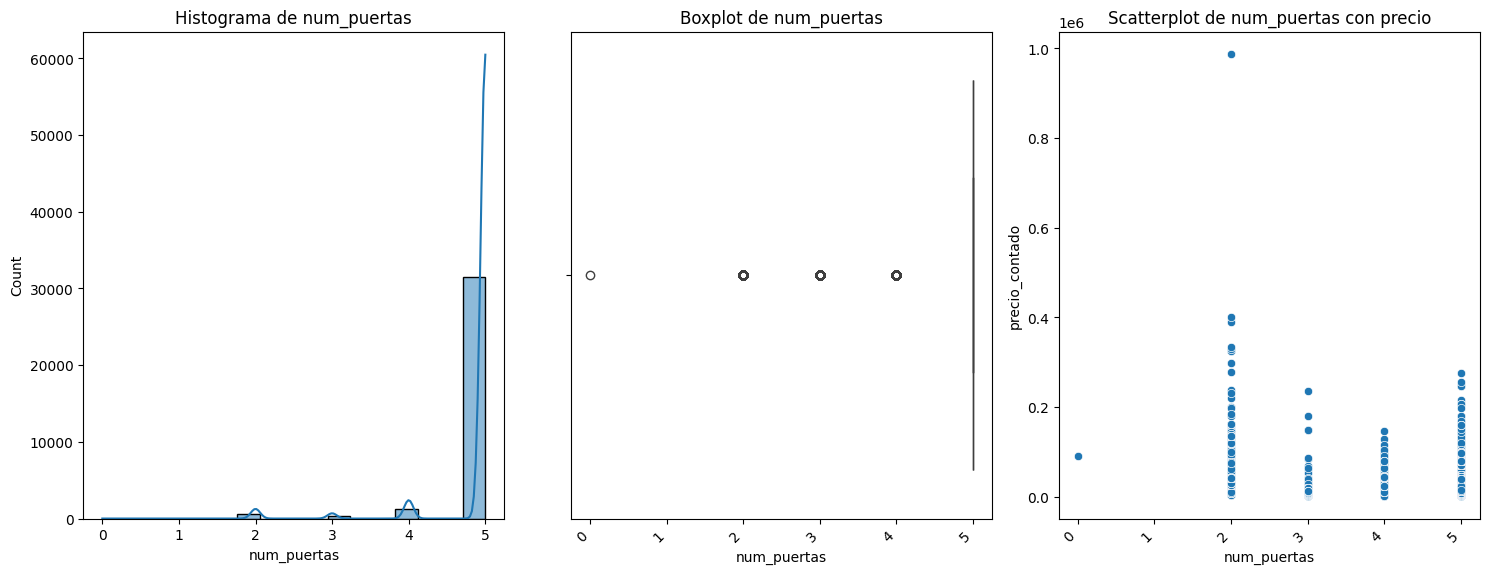

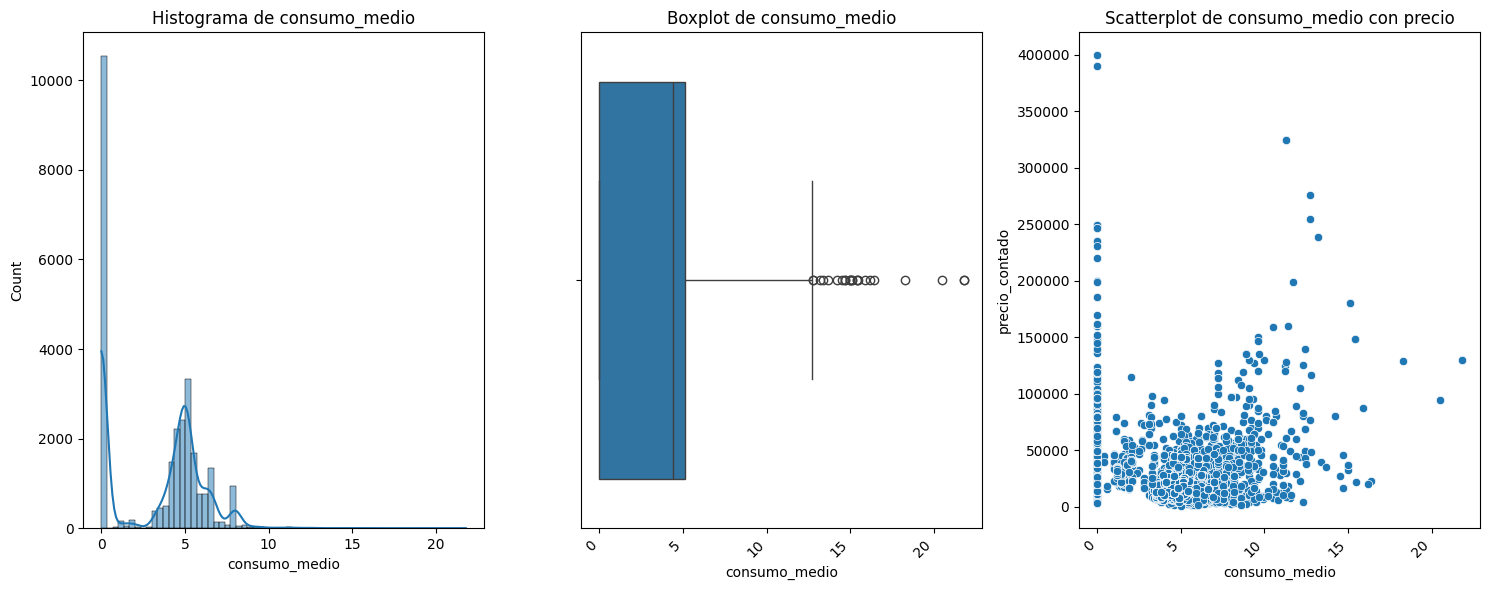

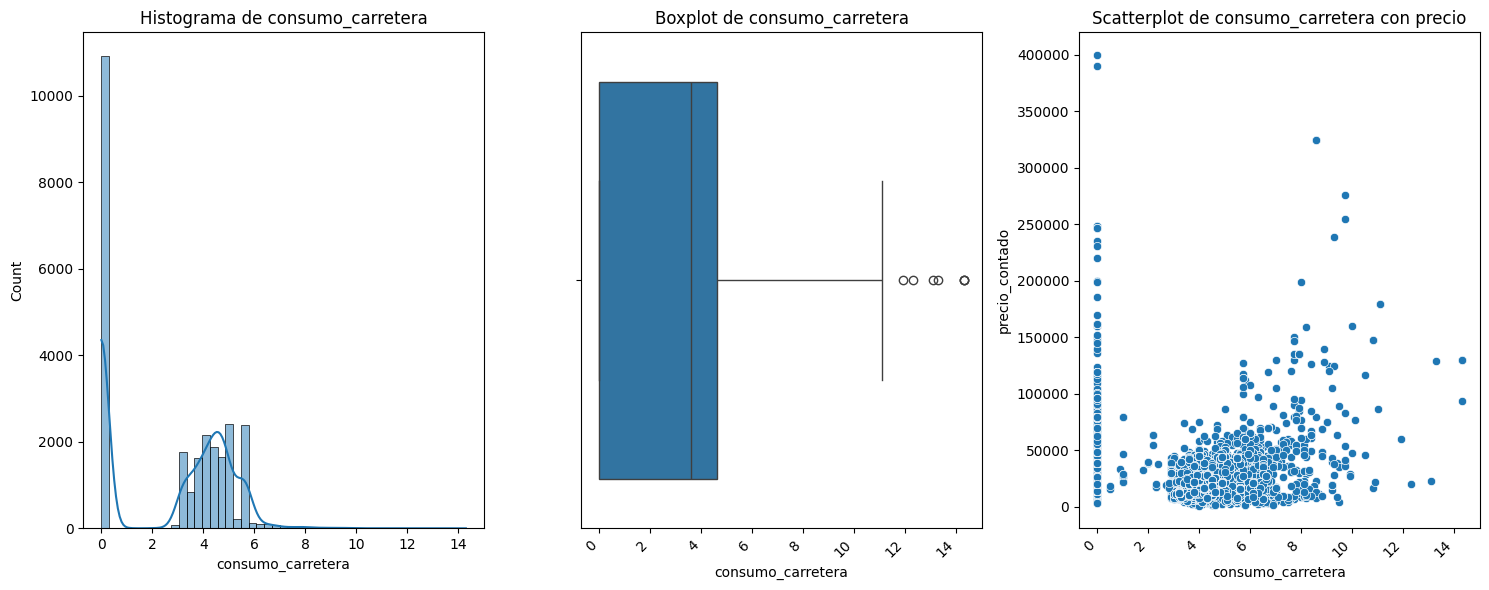

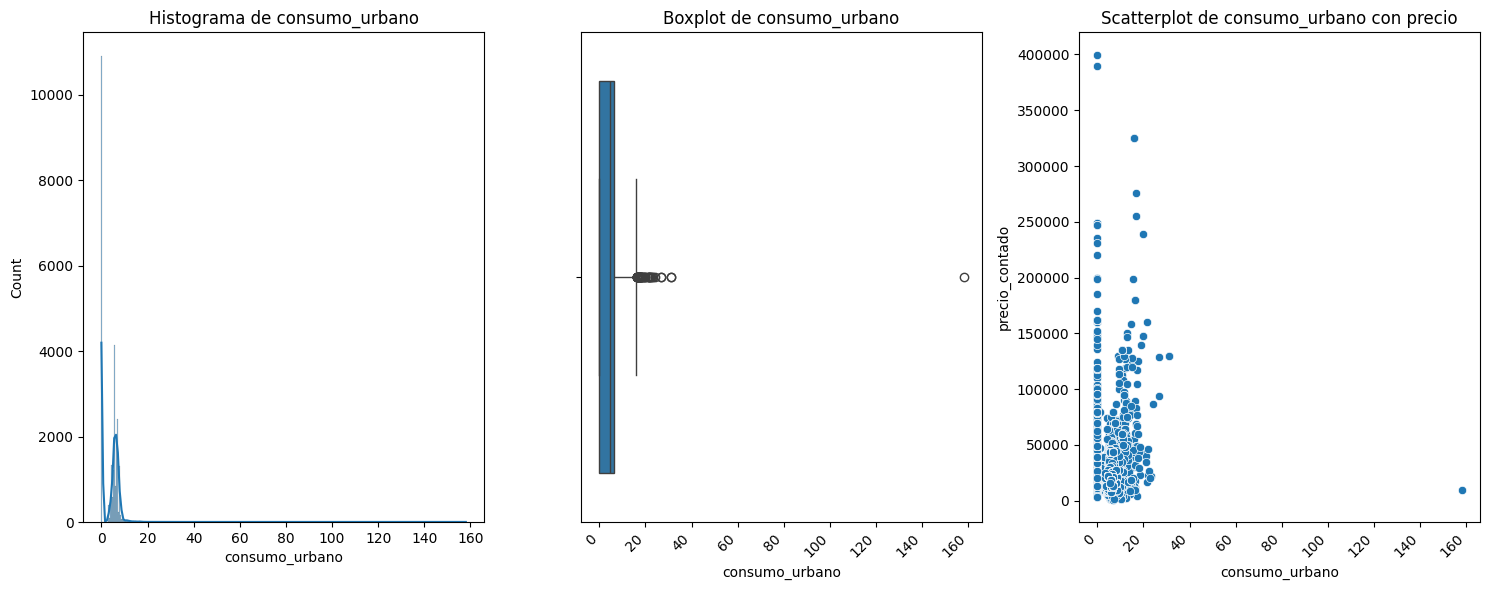

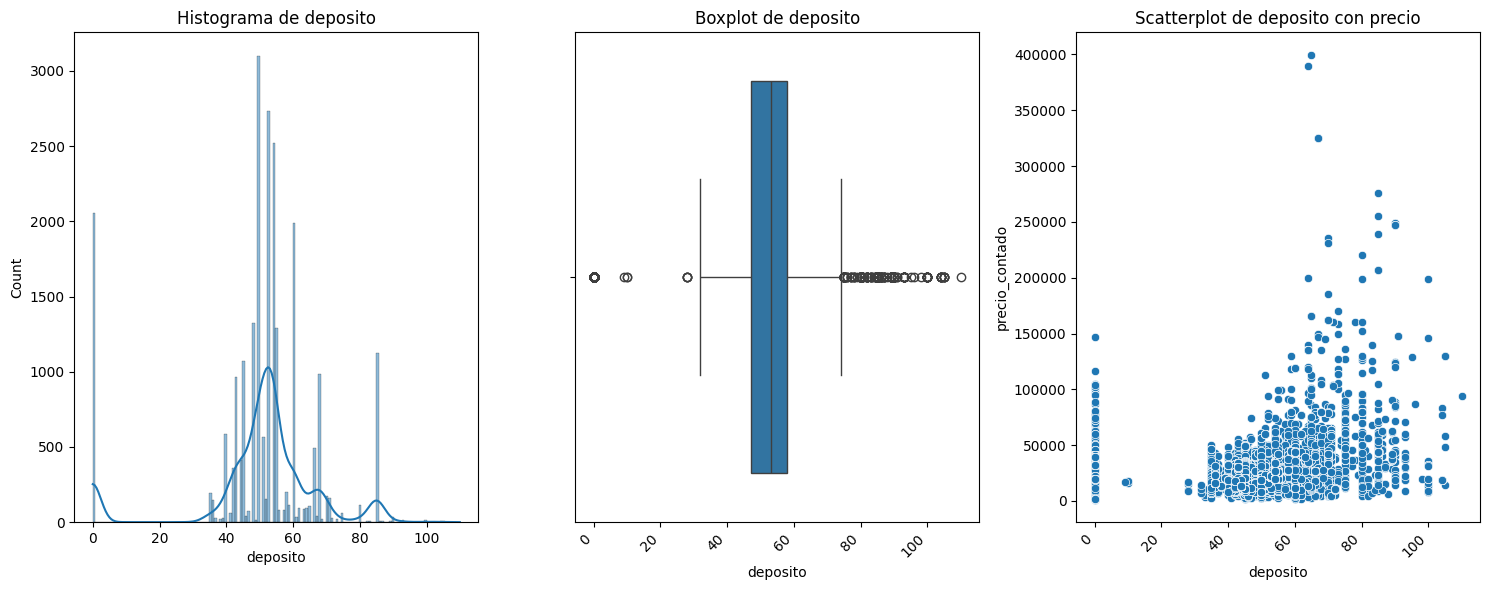

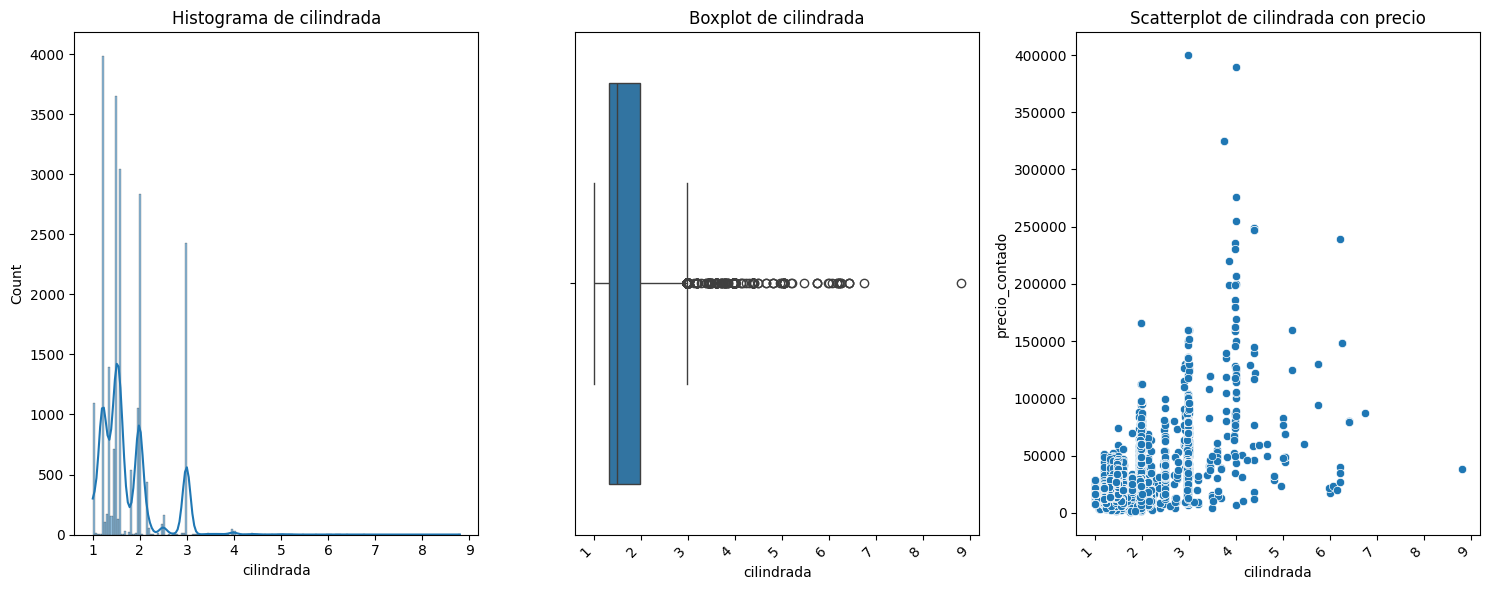

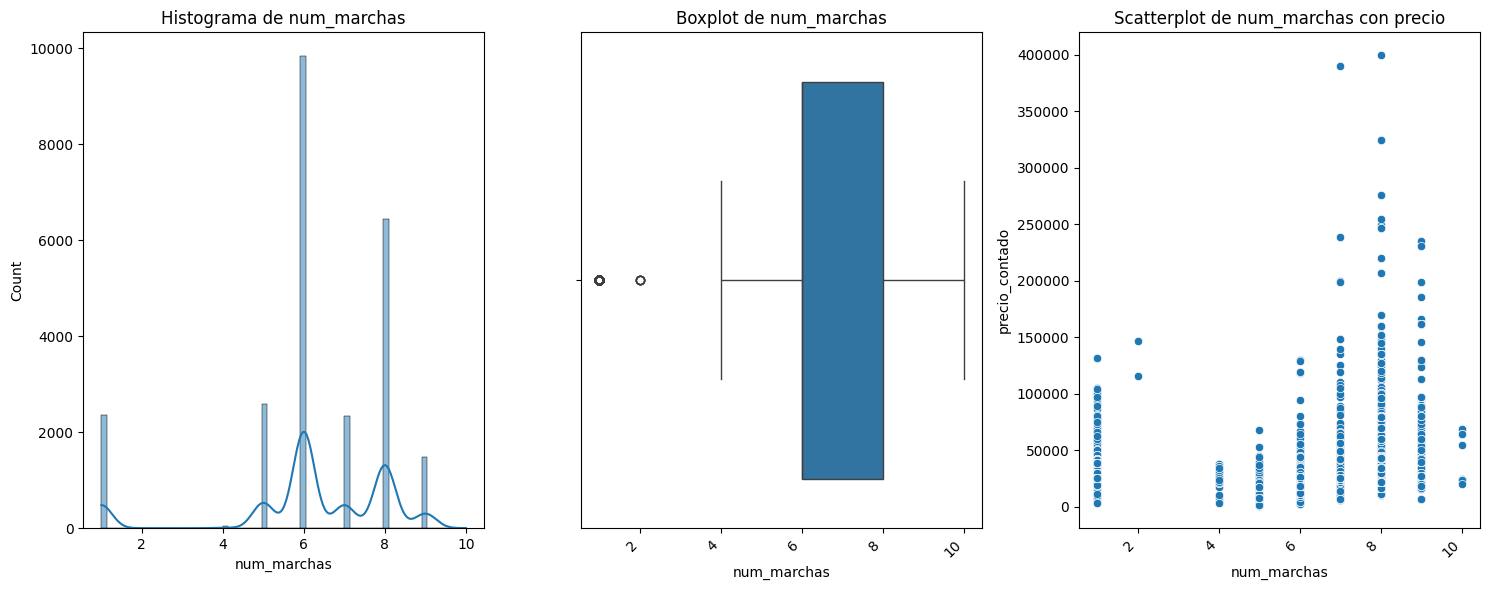

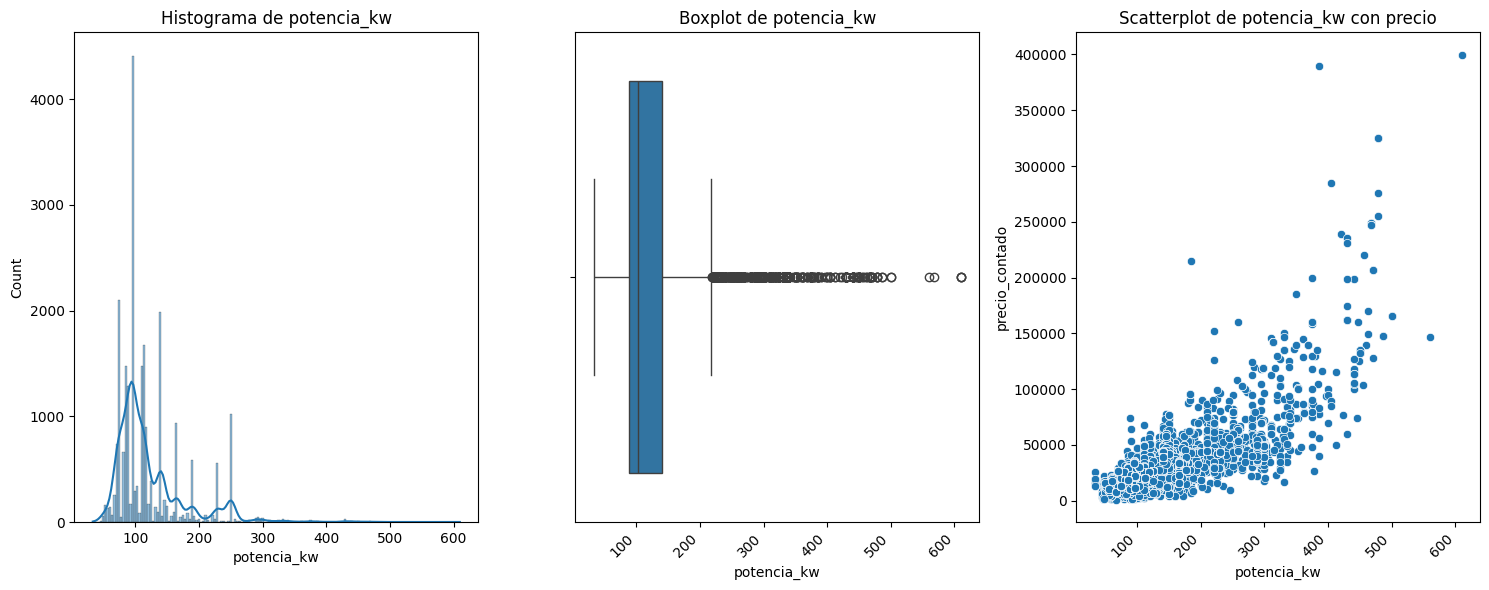

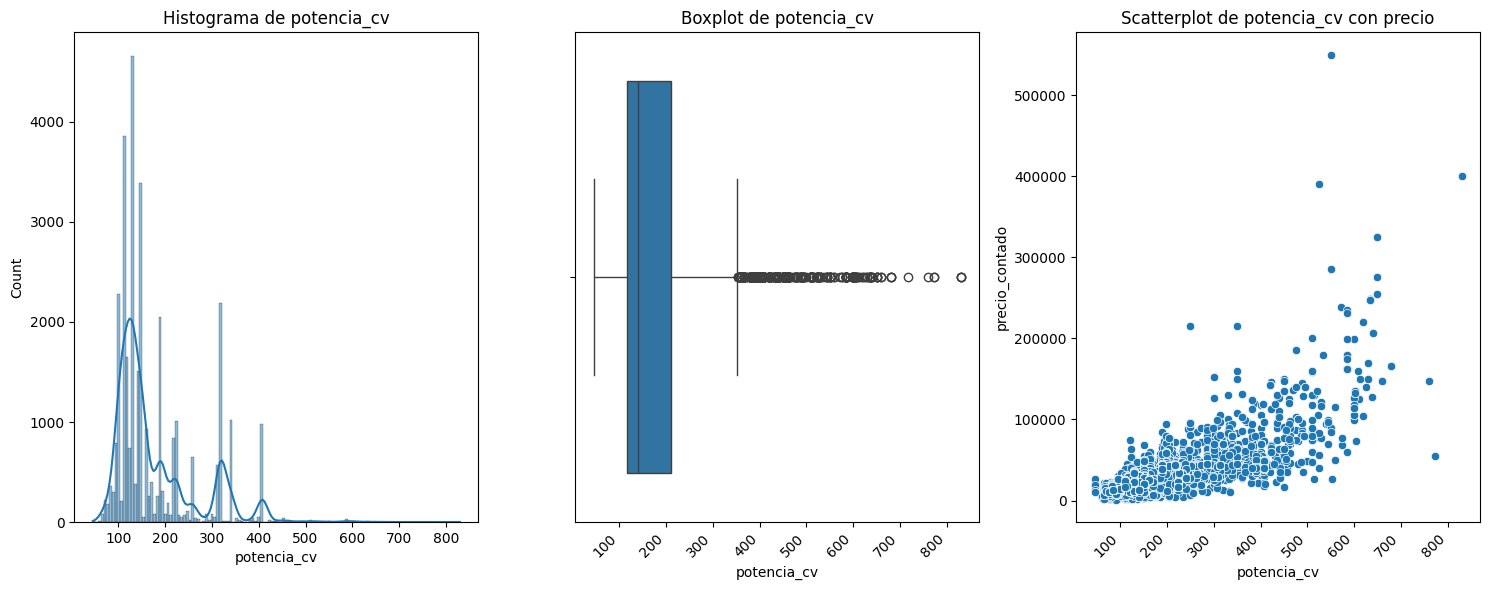

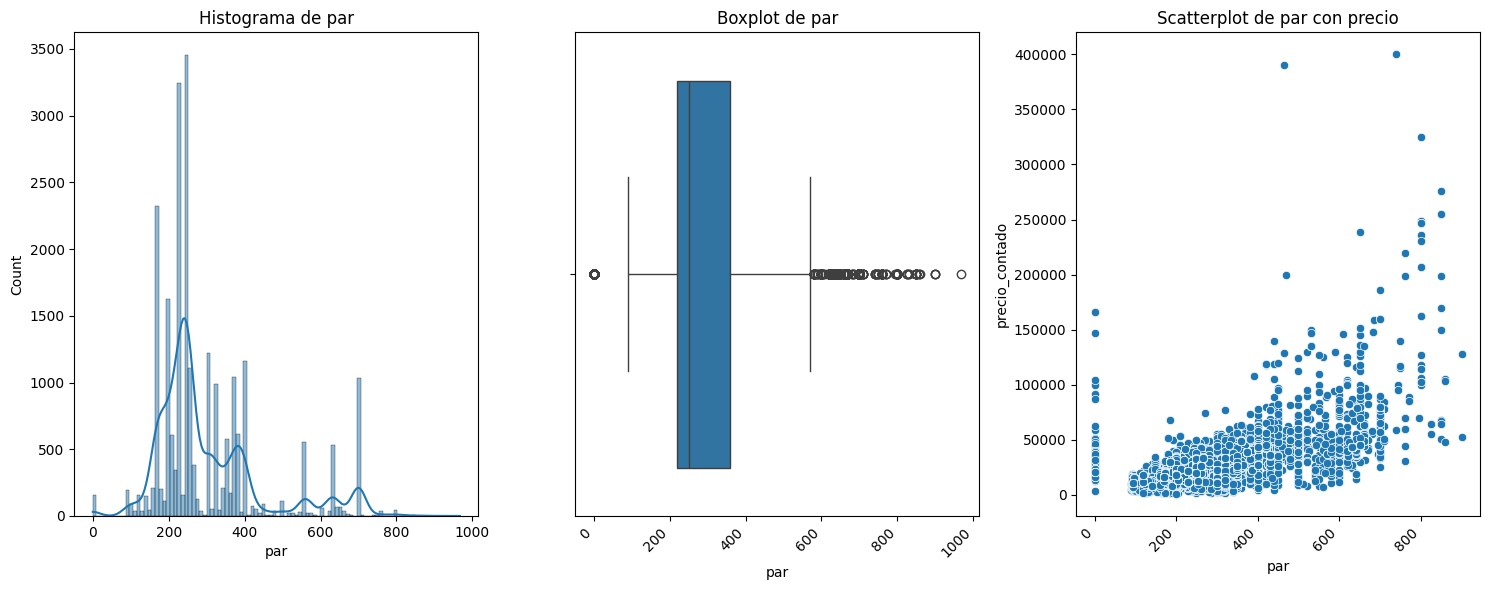

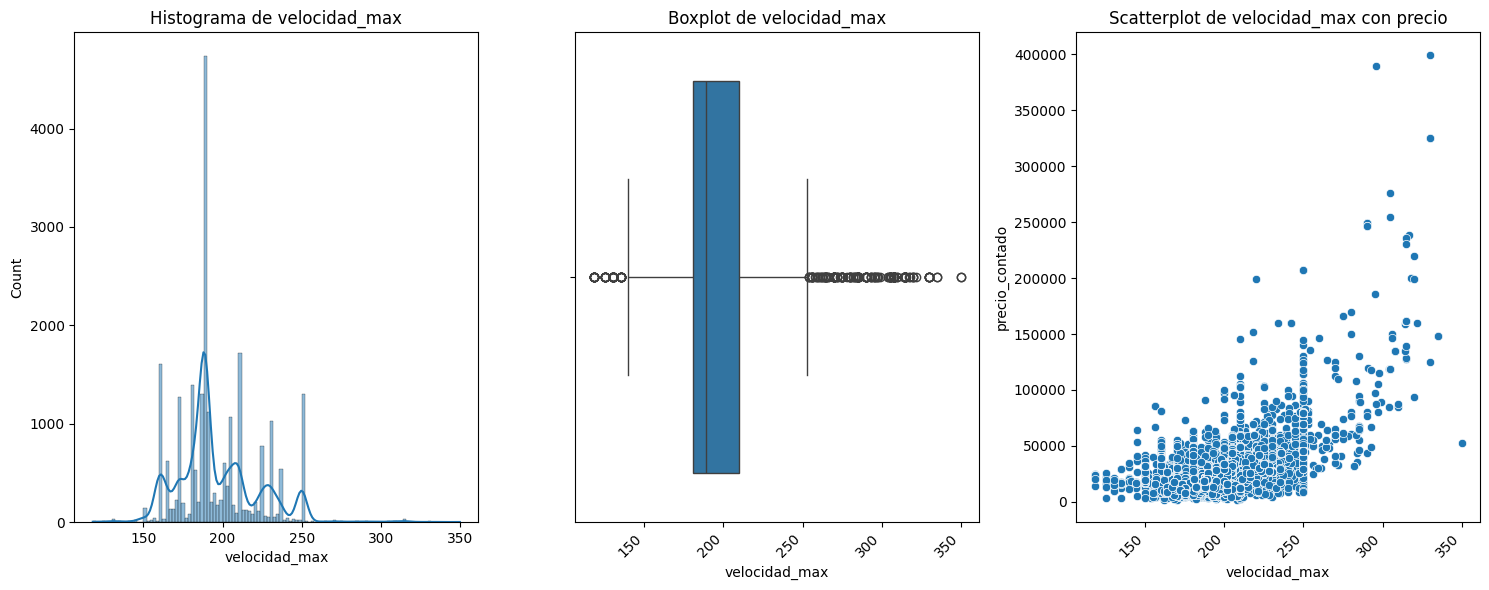

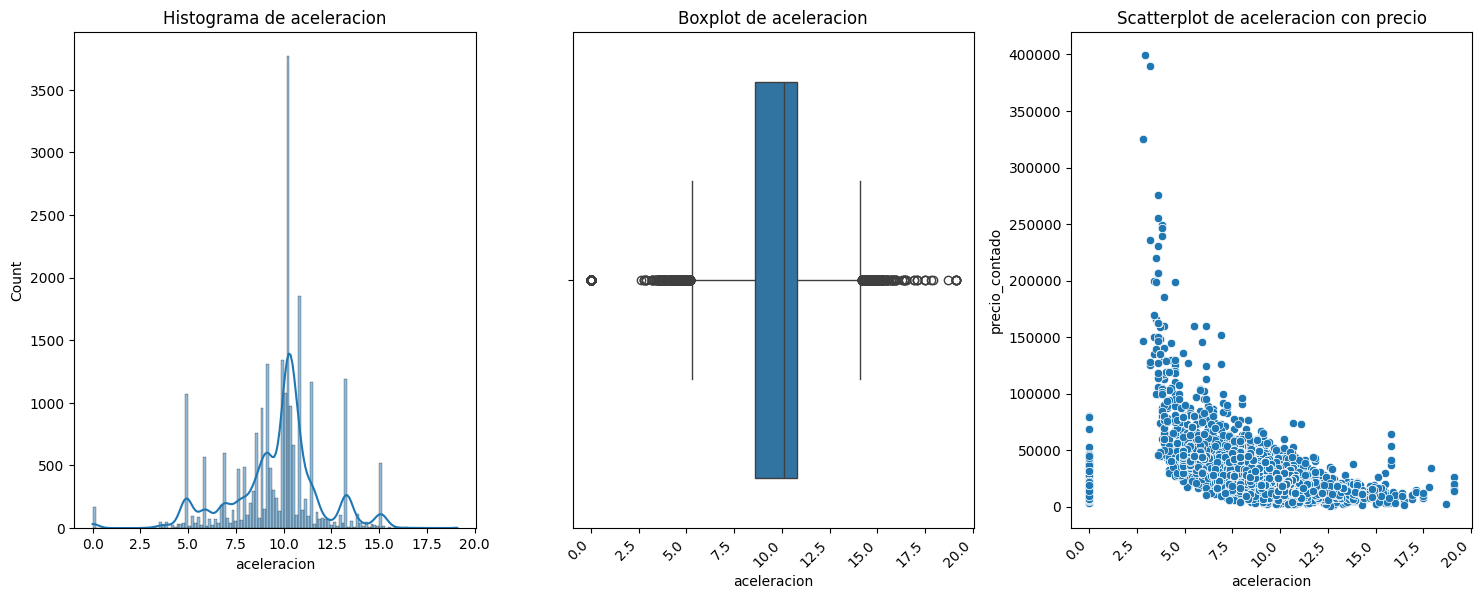

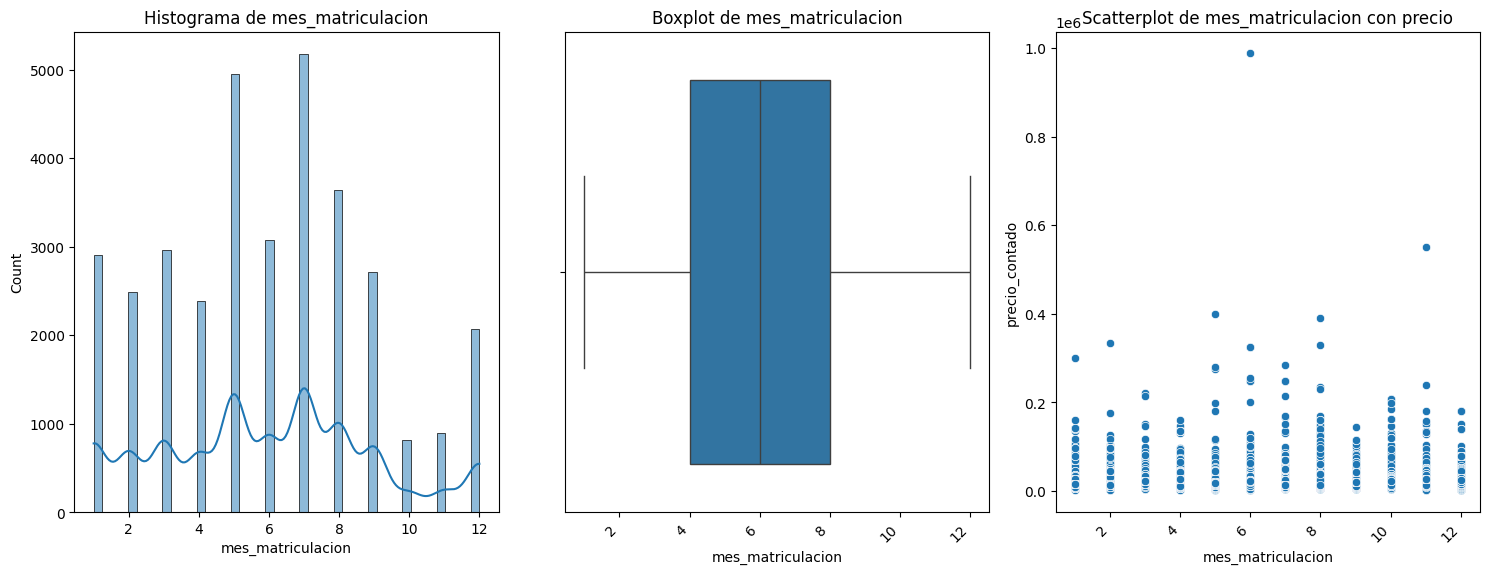

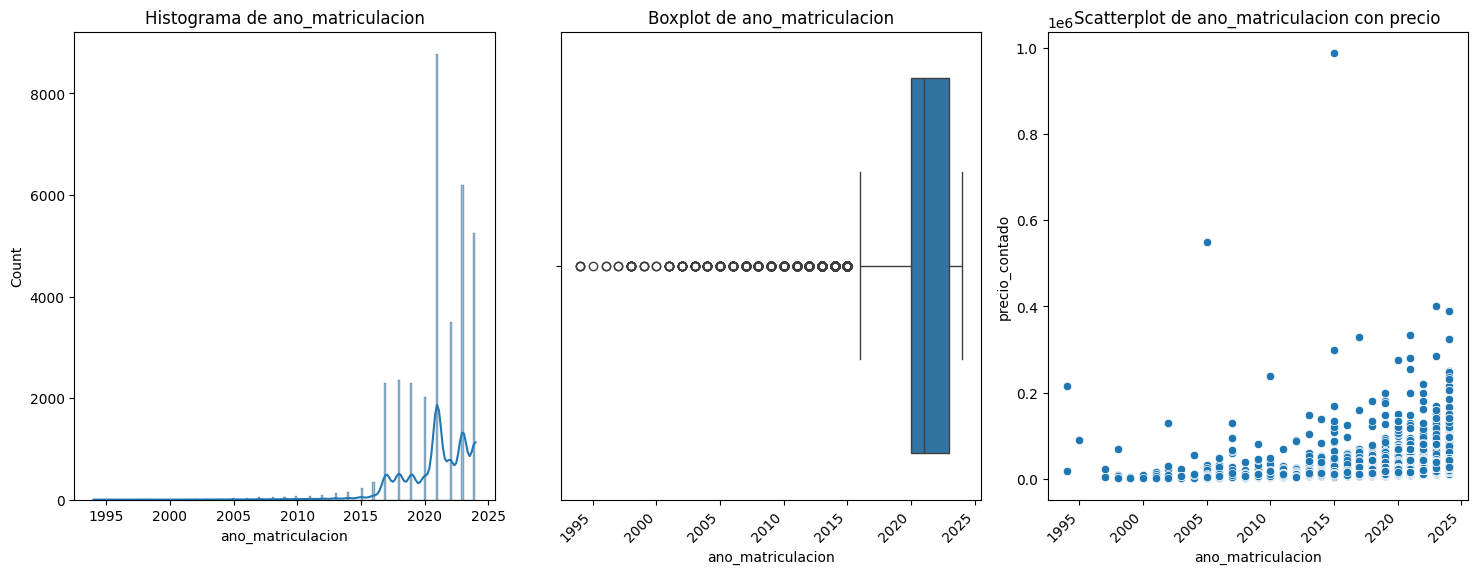

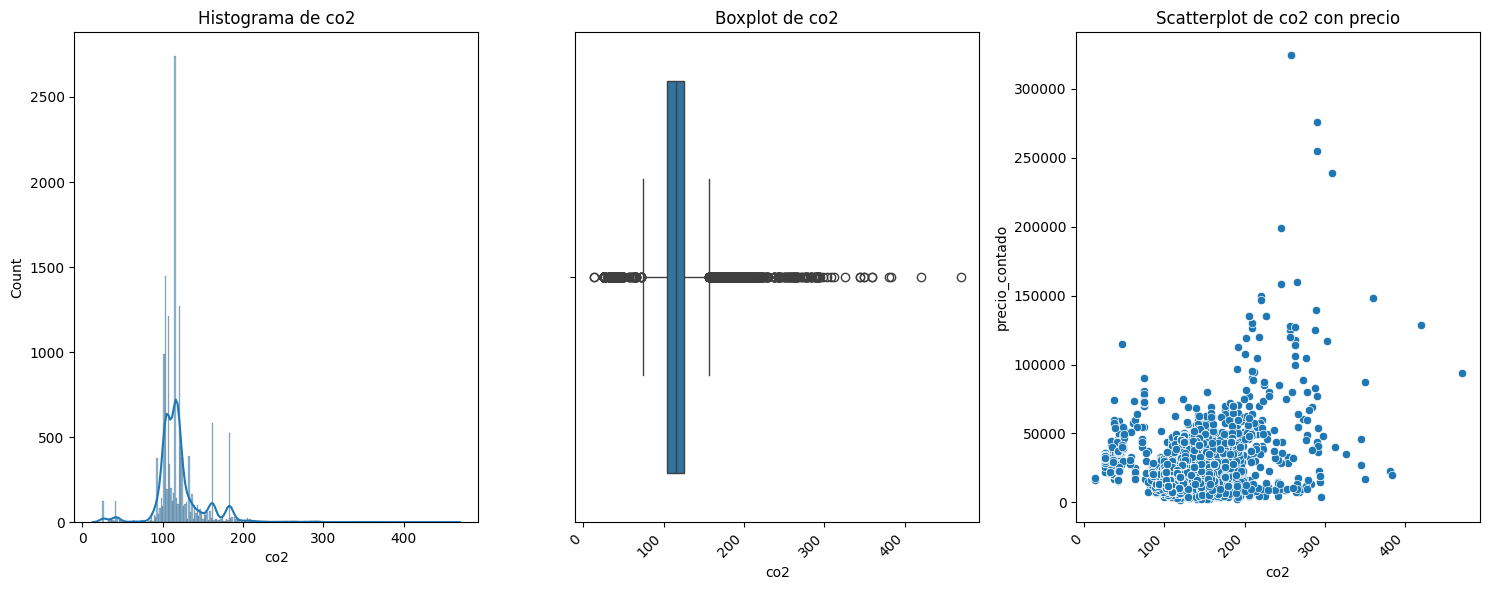

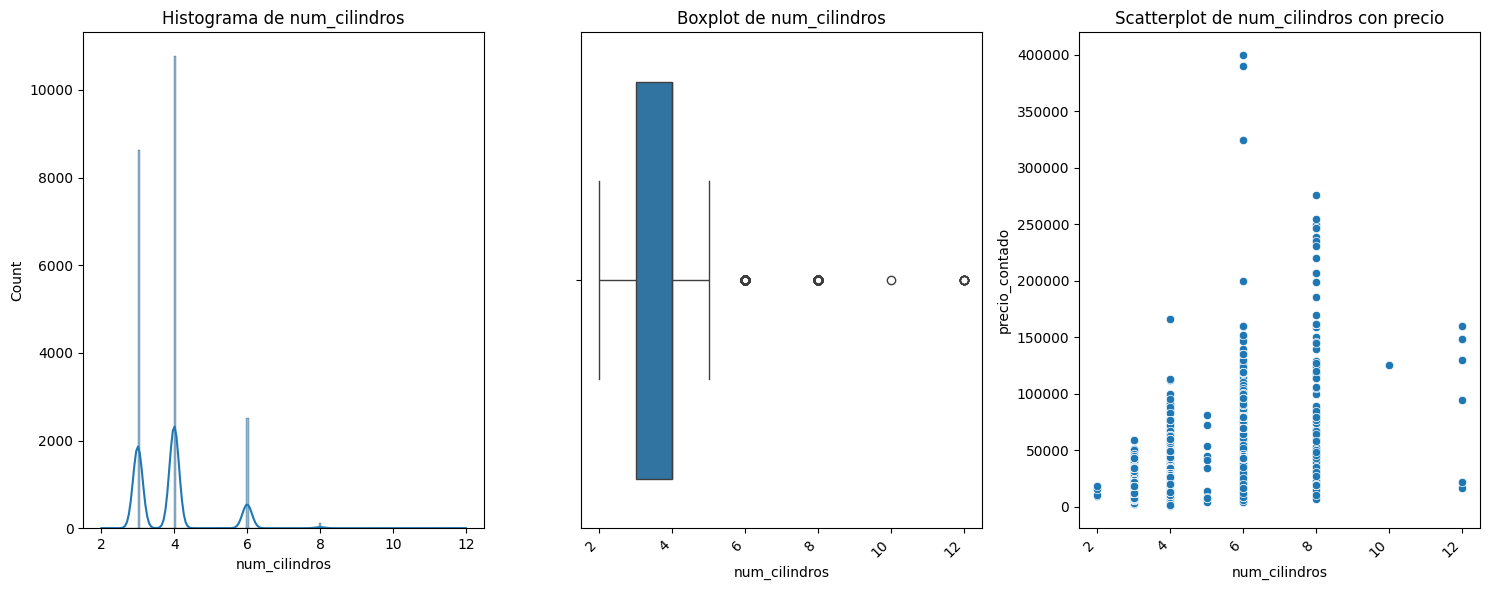

In [50]:
for columna in continuous_columns:
    metricas(df, columna)

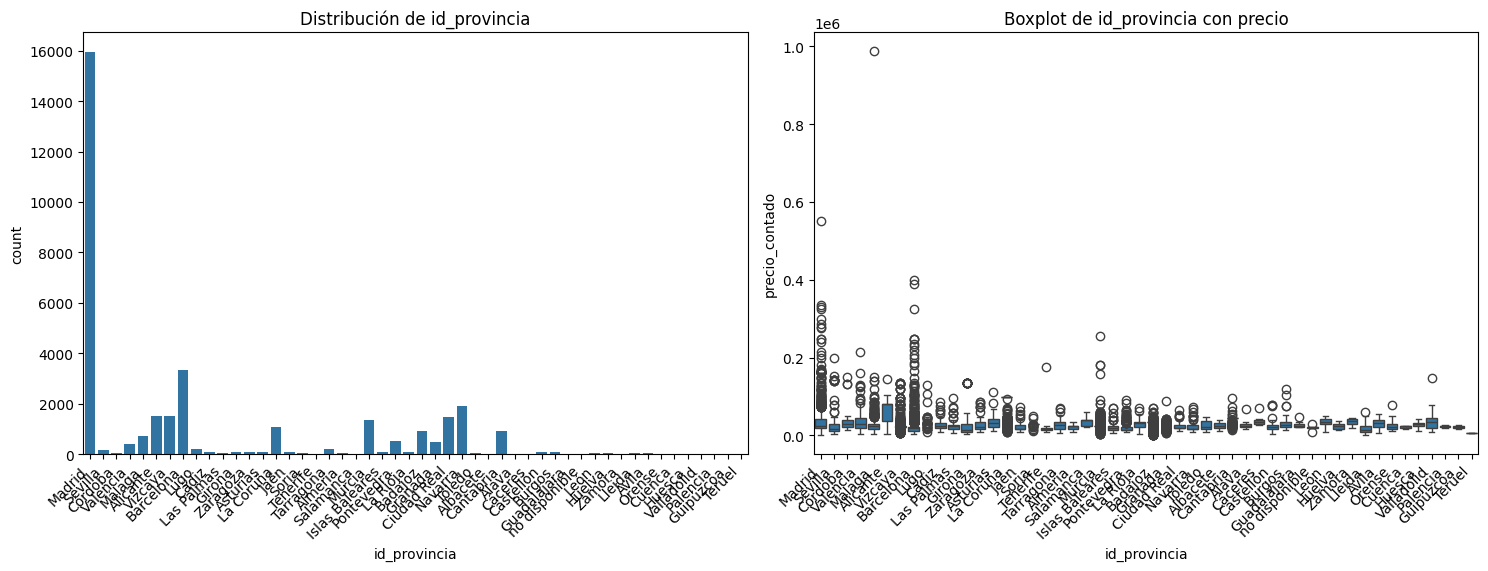

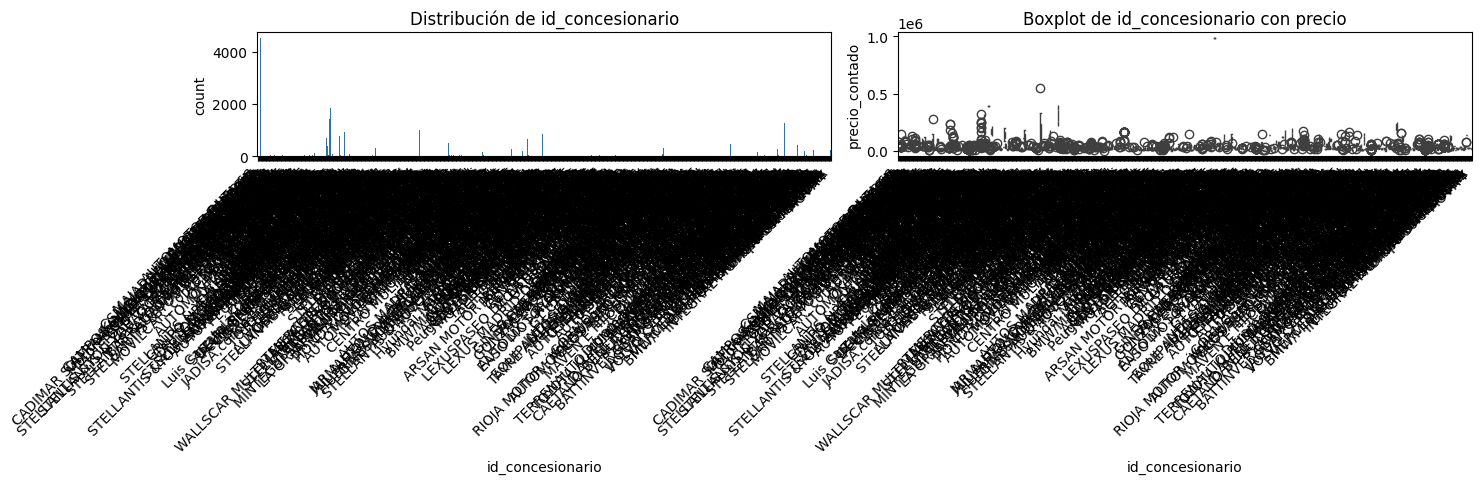

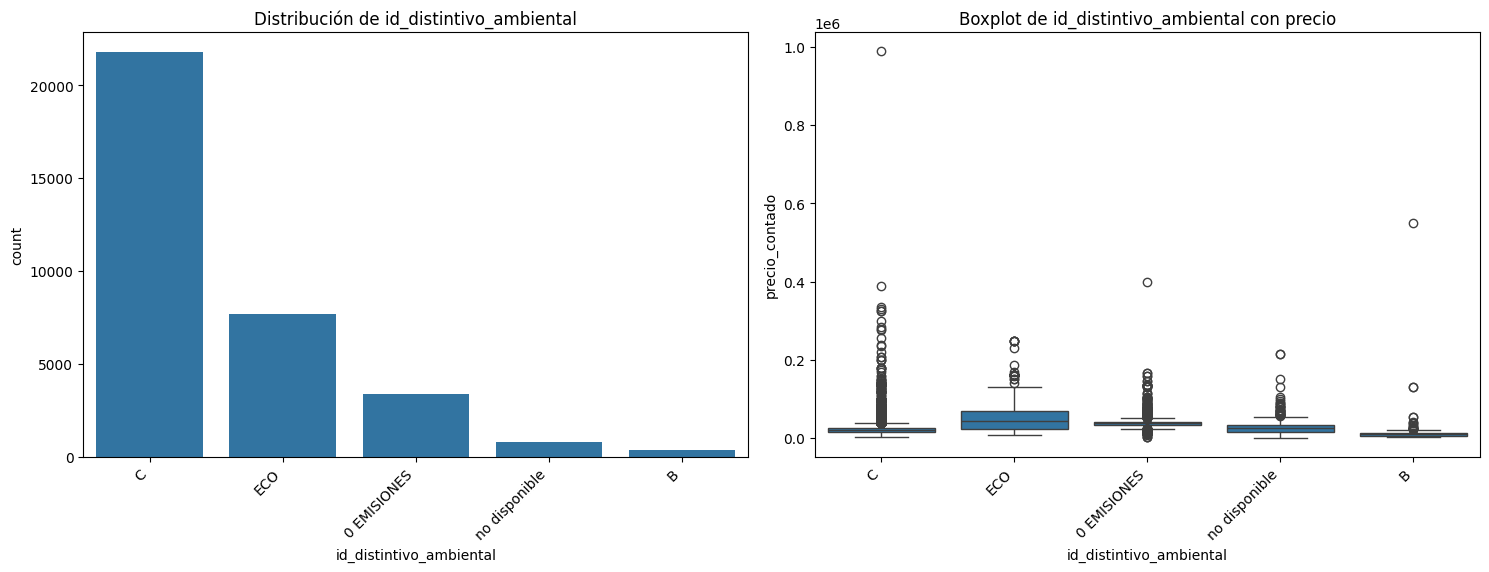

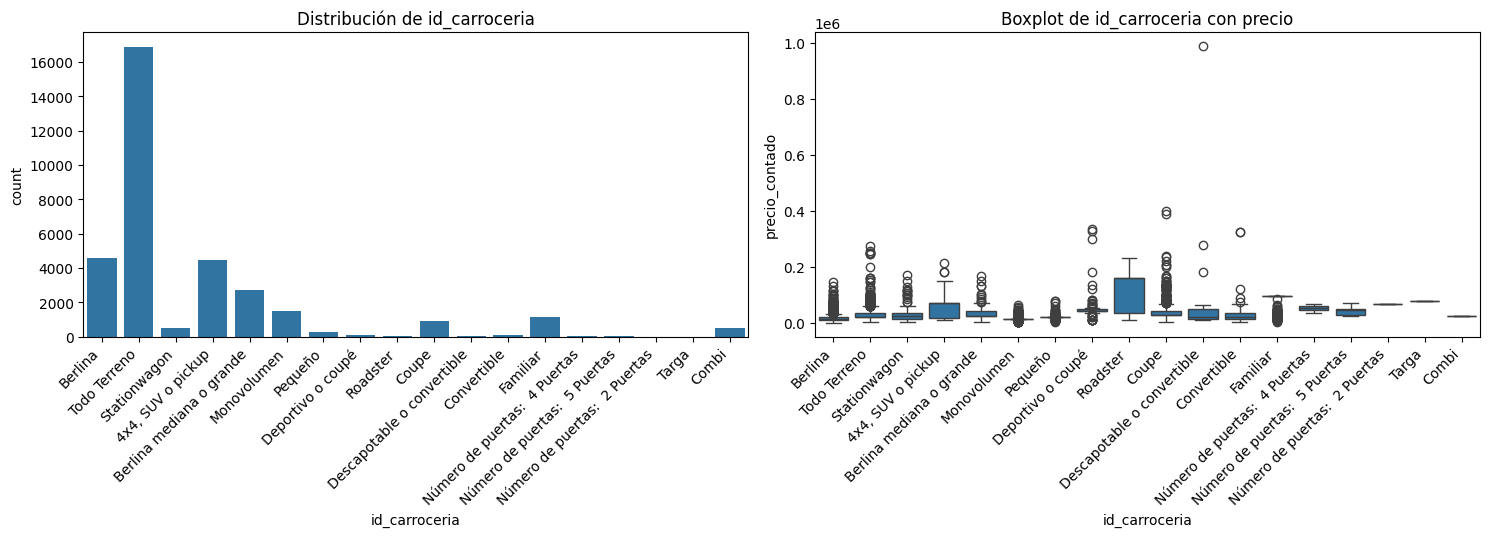

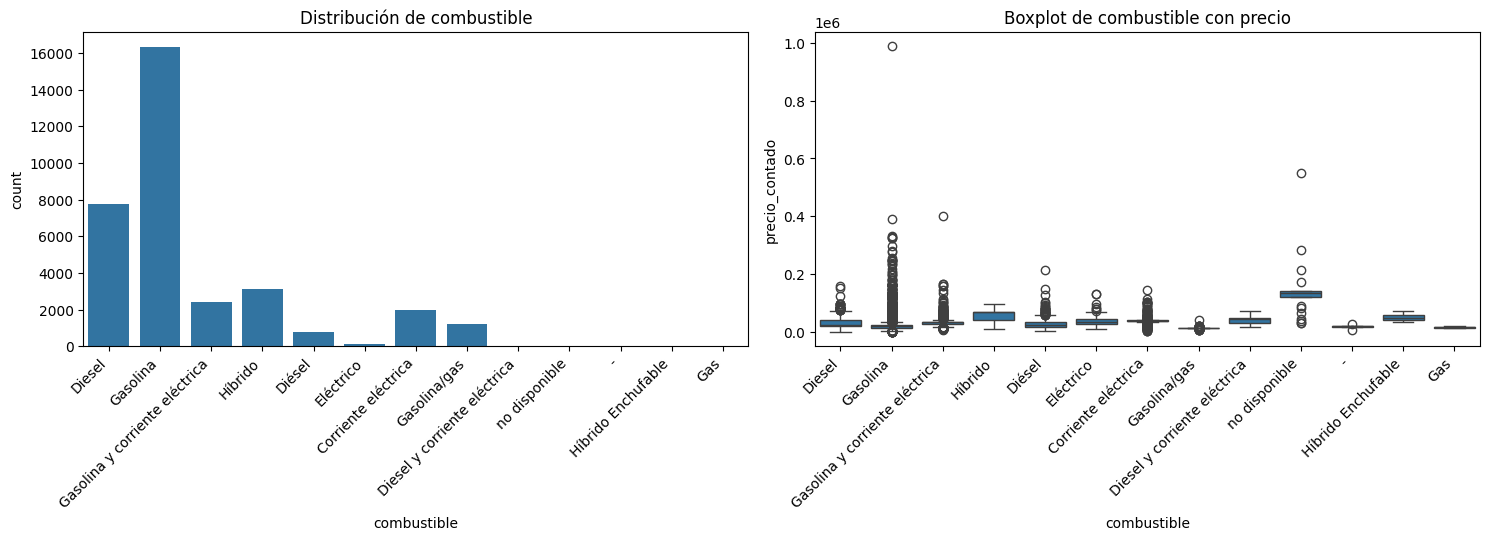

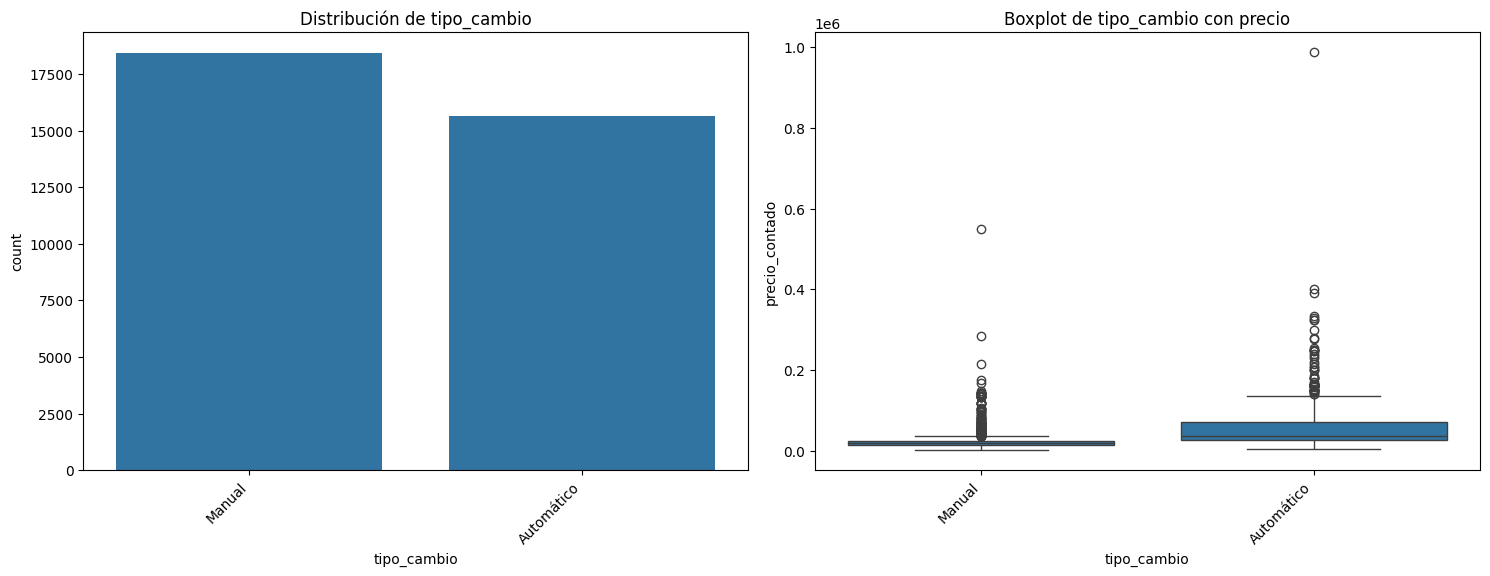

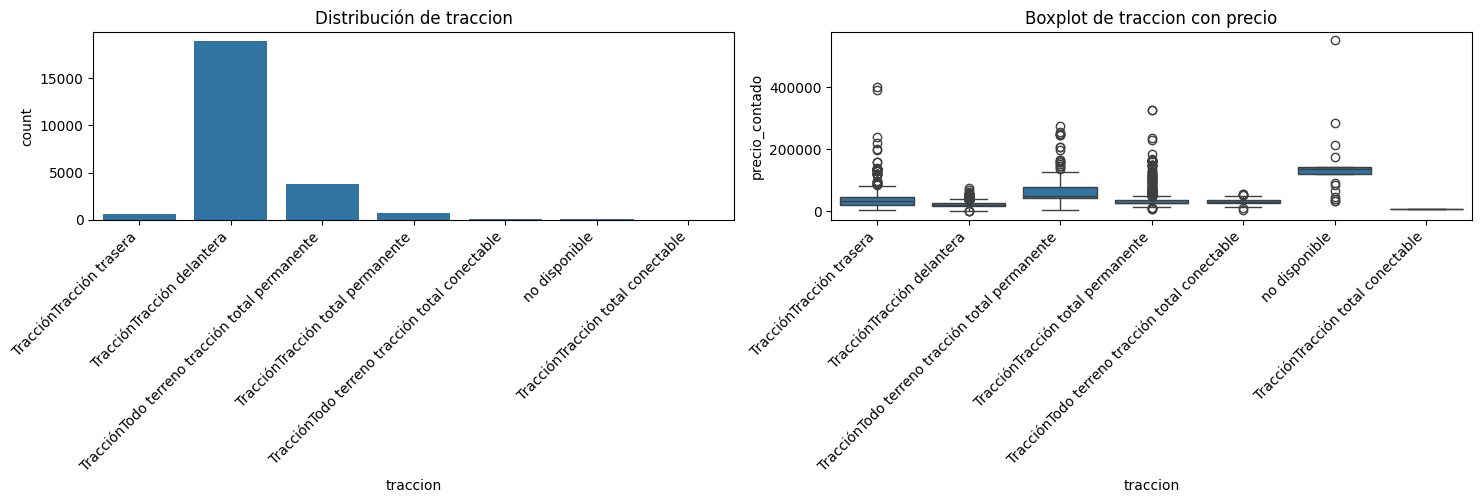

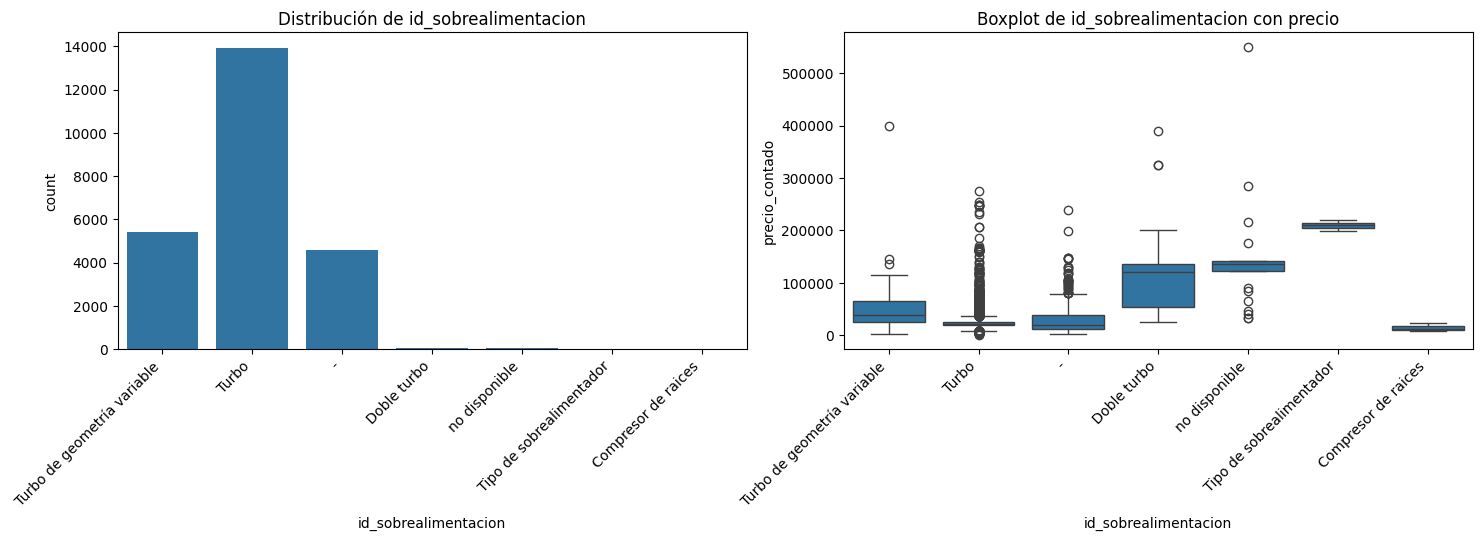

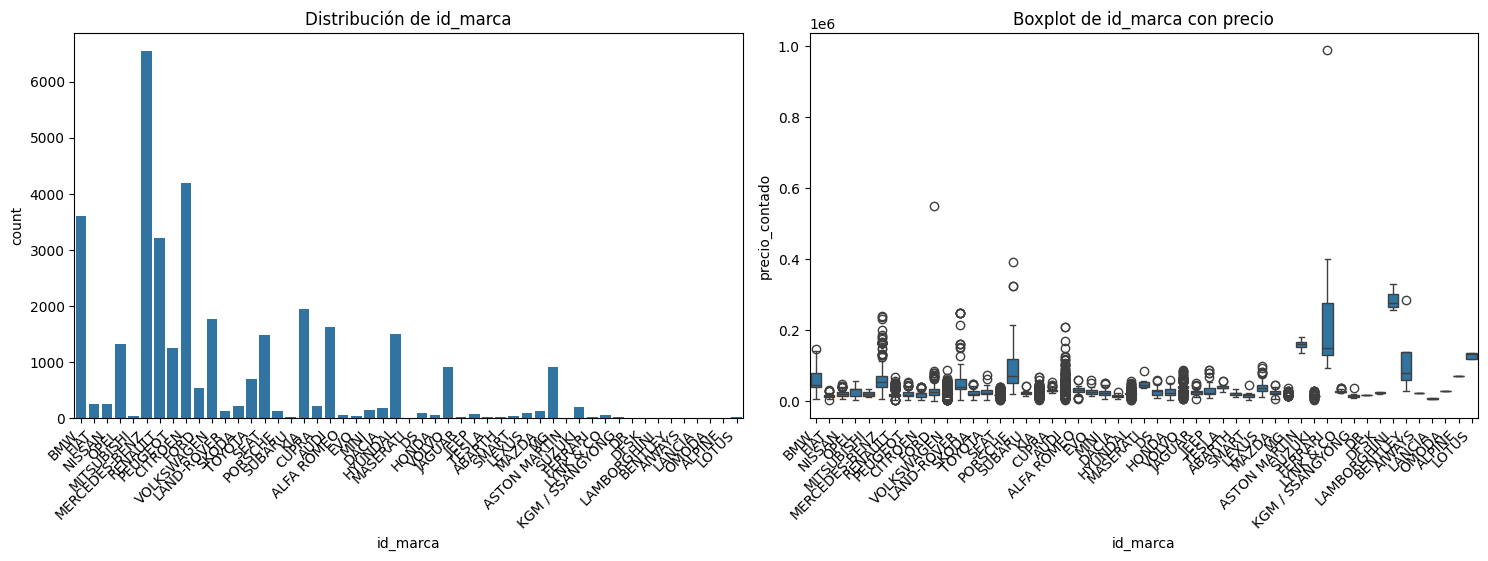

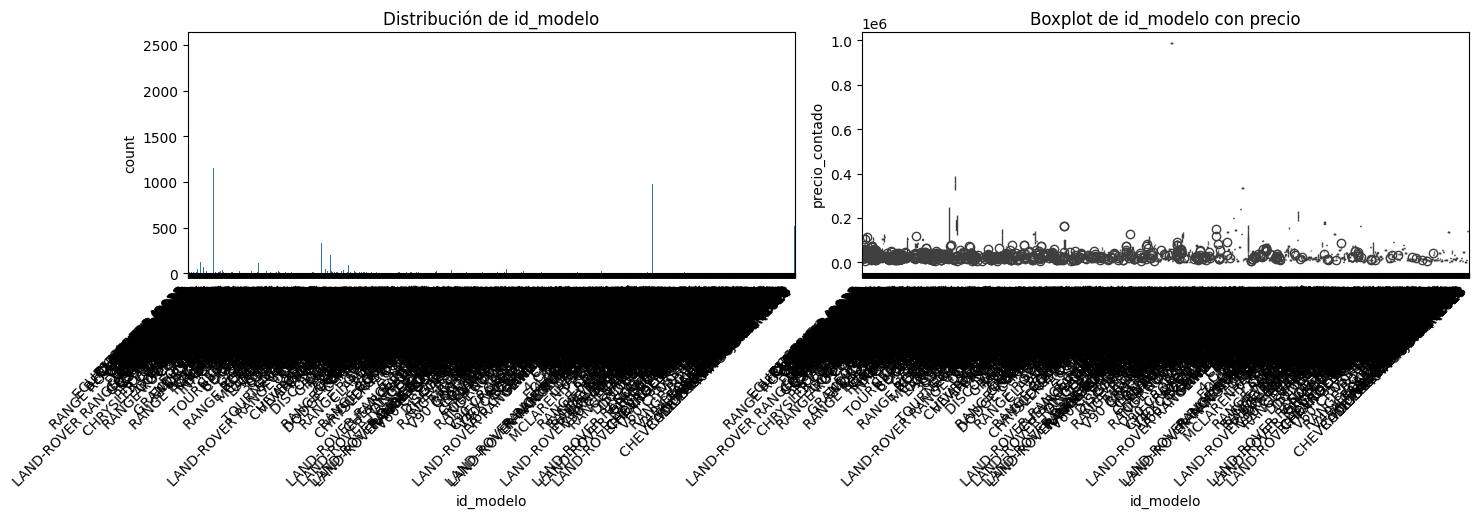

In [51]:
for columna in categorical_columns:
    metricas(df, columna)

In [52]:
continuous_columns

Index(['kilometraje', 'garantia', 'precio_contado', 'precio_nuevo', 'largo',
       'ancho', 'alto', 'capacidad_maletero', 'num_plazas', 'batalla', 'peso',
       'num_puertas', 'consumo_medio', 'consumo_carretera', 'consumo_urbano',
       'deposito', 'cilindrada', 'num_marchas', 'potencia_kw', 'potencia_cv',
       'par', 'velocidad_max', 'aceleracion', 'mes_matriculacion',
       'ano_matriculacion', 'co2', 'num_cilindros'],
      dtype='object')

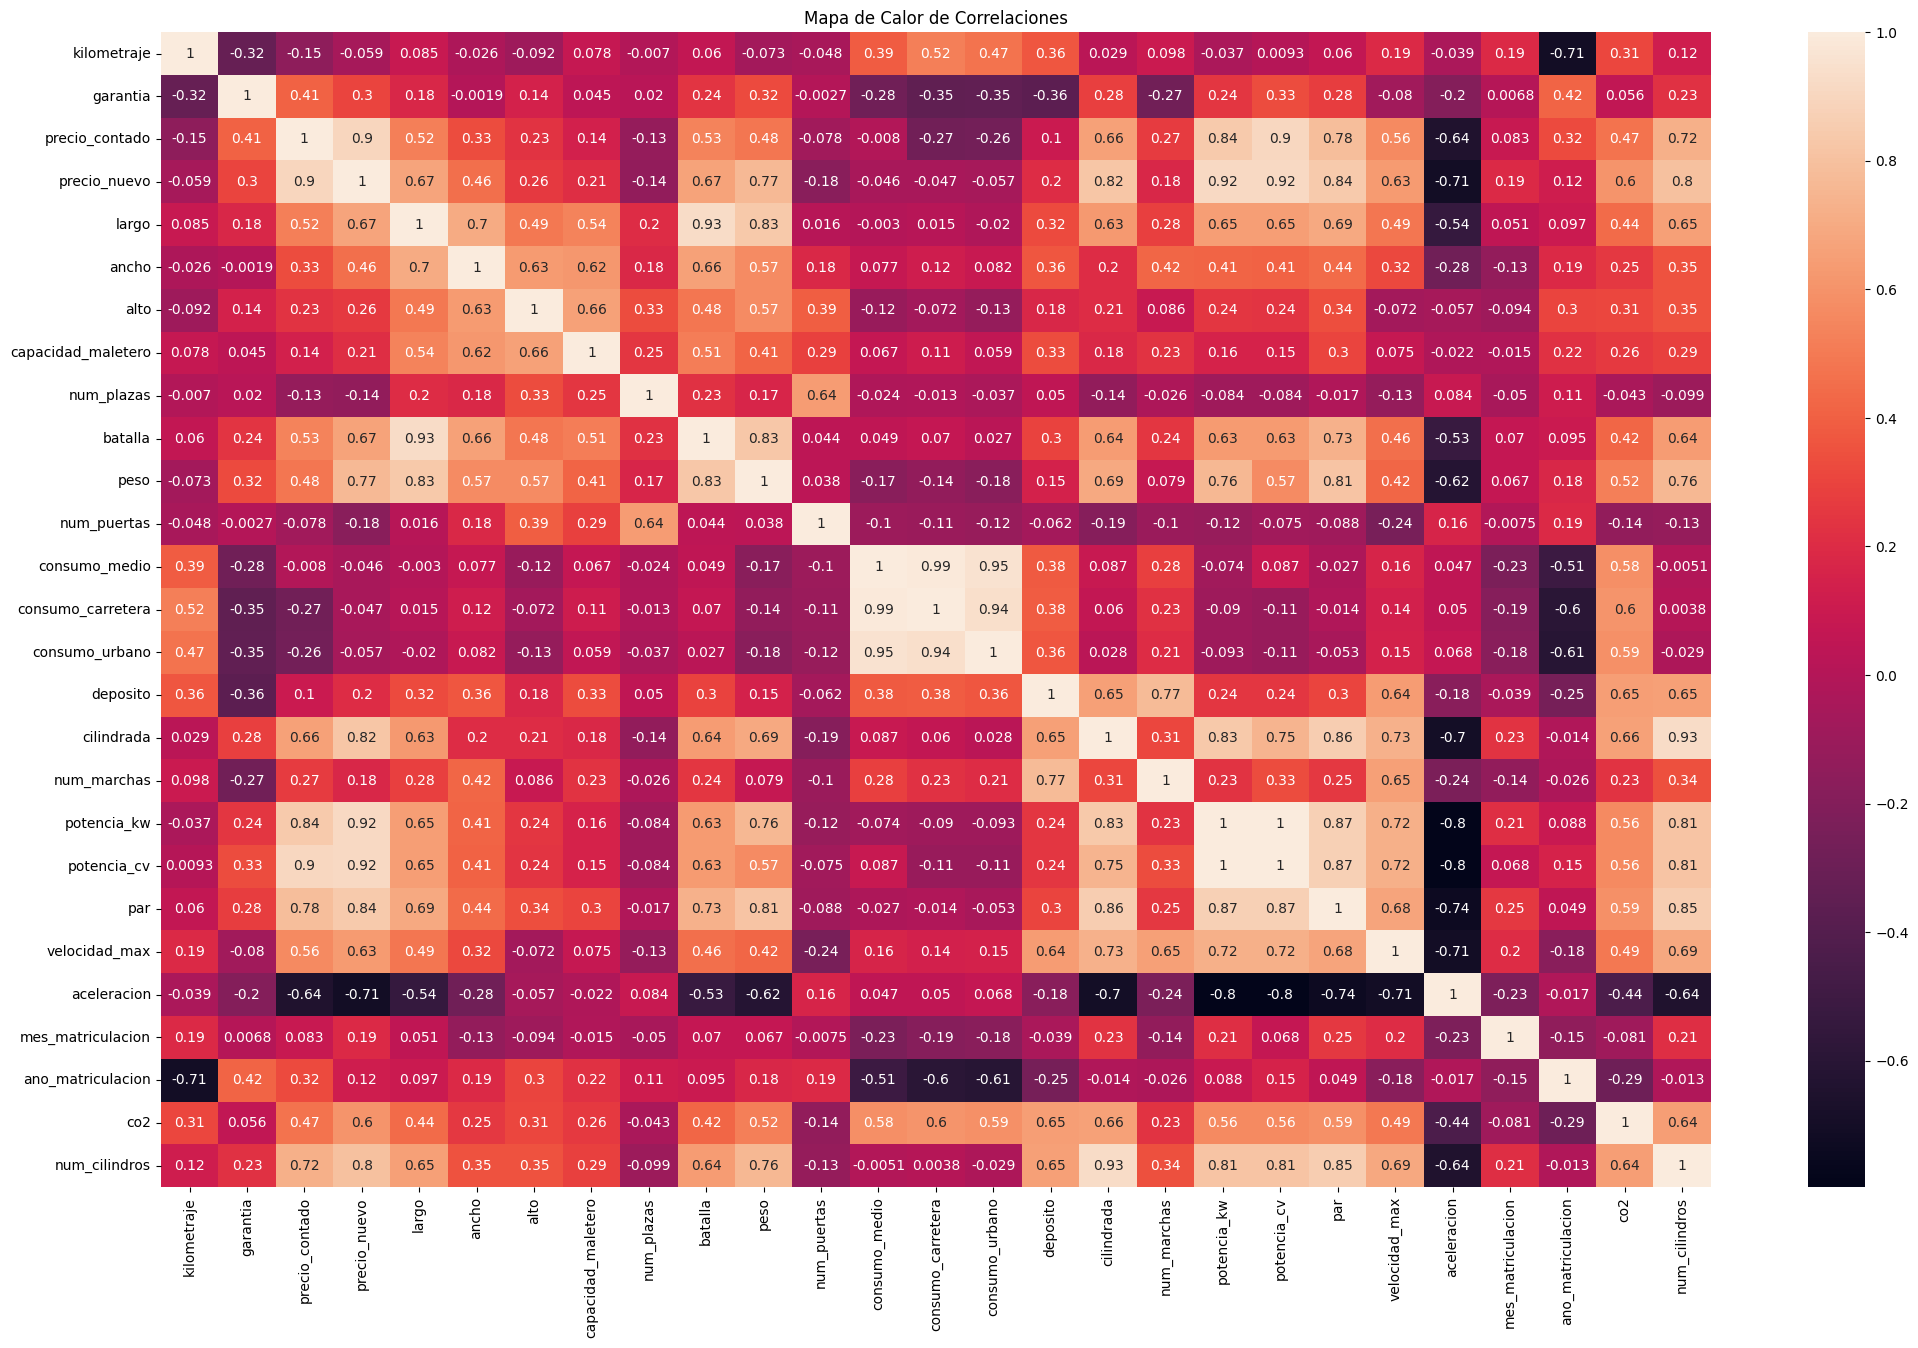

In [53]:
correlation_matrix = df[continuous_columns].corr()

plt.figure(figsize=(25, 15))

sns.heatmap(correlation_matrix, annot=True)

plt.title('Mapa de Calor de Correlaciones')
plt.show()

In [54]:
df.head()

id_provincia  kilometraje  id_concesionario id_distintivo_ambiental  \
0       Madrid        58000           RUTA 66                       C   
1       Madrid        34680           RUTA 66                     ECO   
2       Madrid        66933  AUTOMOTOR DURSAN                       C   
3      Sevilla       159000         Mules Car                       C   
4       Madrid        62695    CLICARS MADRID             0 EMISIONES   

   garantia  precio_contado  precio_nuevo   largo   ancho    alto  \
0      12.0         19990.0       37250.0  4633.0  1811.0  1429.0   
1      12.0         12990.0       19300.0  3571.0  1627.0  1488.0   
2      12.0         17390.0       26650.0  4377.0  1806.0  1590.0   
3      12.0          8000.0       22425.0  4702.0  1809.0  1499.0   
4      12.0         22990.0       44700.0  4545.0  1805.0  1685.0   

   capacidad_maletero id_carroceria  num_plazas  batalla   peso  num_puertas  \
0               480.0       Berlina         5.0    2.810  2.045            4   
1               185.0       Berlina         4.0    2.300  1.055            3   
2               430.0  Todo Terreno         5.0    2.646  1.910            5   
3               540.0  Stationwagon         5.0    2.662  1.985            5   
4               404.0  Todo Terreno         5.0    2.670  2.425            5   

   consumo_medio  consumo_carretera  consumo_urbano  deposito  \
0            4.5                4.0             5.3      57.0   
1            0.0                0.0             0.0      35.0   
2            3.8                3.6             4.2      55.0   
3            3.6                3.3             4.2      48.0   
4            0.0                0.0             0.0      43.0   

                      combustible  cilindrada tipo_cambio  \
0                          Diesel       1.995      Manual   
1                        Gasolina         NaN      Manual   
2                          Diesel       1.461      Manual   
3                          Diesel       1.598      Manual   
4  Gasolina y corriente eléctrica       2.360      Manual   

                                         traccion  num_marchas  potencia_kw  \
0                        TracciónTracción trasera          6.0        110.0   
1                      TracciónTracción delantera          6.0         52.0   
2                      TracciónTracción delantera          6.0         81.0   
3                      TracciónTracción delantera          6.0         81.0   
4  TracciónTodo terreno tracción total permanente          1.0        138.0   

   potencia_cv    par  velocidad_max  aceleracion  mes_matriculacion  \
0        150.0  320.0          215.0          8.7                 11   
1         70.0   92.0          167.0         13.8                 12   
2        110.0  260.0          182.0         11.9                  4   
3        110.0  300.0          195.0         11.4                  1   
4        188.0  193.0          162.0         10.9                  7   

   ano_matriculacion    co2  num_cilindros          id_sobrealimentacion  \
0               2018  118.0            4.0   Turbo de geometría variable   
1               2021    NaN            3.0                         Turbo   
2               2017  103.0            4.0                         Turbo   
3               2017   99.0            4.0                         Turbo   
4               2022    NaN            4.0                         Turbo   

     id_marca            id_modelo  
0         BMW        SERIE 3 (2018  
1        FIAT            500 (2021  
2      NISSAN        QASHQAI (2017  
3        OPEL          ASTRA (2017  
4  MITSUBISHI  ECLIPSE CROSS (2022

In [55]:
listado_provincias = {}
for index,detalle in enumerate (df['id_provincia'].unique(), start = 1):
    detalle = detalle
    
    listado_provincias[index] = detalle

df_provincias = pd.DataFrame.from_dict(listado_provincias, orient='index', columns=['nombre_provincia']).reset_index()
df_provincias.rename(columns={'index': 'id_provincia'}, inplace=True)
df_provincias.to_csv('../bin/listado_provincias.csv', index=False)

conversion_provincias = {v: k for k, v in listado_provincias.items()}
df['id_provincia'] = df['id_provincia'].map(conversion_provincias)

In [56]:
listado_concesionarios = {}
for index,detalle in enumerate (df['id_concesionario'].unique(), start = 1):
    detalle = detalle
    
    listado_concesionarios[index] = detalle

df_concesionarios = pd.DataFrame.from_dict(listado_concesionarios, orient='index', columns=['nombre_concesionario']).reset_index()
df_concesionarios.rename(columns={'index': 'id_concesionario'}, inplace=True)
df_concesionarios.to_csv('../bin/listado_concesionarios.csv', index=False)

conversion = {v: k for k, v in listado_concesionarios.items()}
df['id_concesionario'] = df['id_concesionario'].map(conversion)

In [57]:
listado_modelos = {}
for index,detalle in enumerate (df['id_modelo'].unique(), start = 1):
    detalle = detalle
    
    listado_modelos[index] = detalle

df_modelos = pd.DataFrame.from_dict(listado_modelos, orient='index', columns=['nombre_modelo']).reset_index()
df_modelos.rename(columns={'index': 'id_modelo'}, inplace=True)
df_modelos.to_csv('../bin/listado_modelos.csv', index=False)

conversion = {v: k for k, v in listado_modelos.items()}
df['id_modelo'] = df['id_modelo'].map(conversion)

In [58]:
listado_marcas = {}
for index,detalle in enumerate (df['id_marca'].unique(), start = 1):
    detalle = detalle
    
    listado_marcas[index] = detalle

df_marcas = pd.DataFrame.from_dict(listado_marcas, orient='index', columns=['nombre_marca']).reset_index()
df_marcas.rename(columns={'index': 'id_marca'}, inplace=True)
df_marcas.to_csv('../bin/listado_modelos.csv', index=False)

conversion = {v: k for k, v in listado_marcas.items()}
df['id_marca'] = df['id_marca'].map(conversion)

In [59]:
listado_carrocerias = {}
for index,detalle in enumerate (df['id_carroceria'].unique(), start = 1):
    detalle = detalle
    
    listado_carrocerias[index] = detalle
    
df_carrocerias = pd.DataFrame.from_dict(listado_carrocerias, orient='index', columns=['nombre_carroceria']).reset_index()
df_carrocerias.rename(columns={'index': 'id_carroceria'}, inplace=True)
df_carrocerias.to_csv('../bin/listado_carrocerias.csv', index=False)

conversion = {v: k for k, v in listado_carrocerias.items()}
df['id_carroceria'] = df['id_carroceria'].map(conversion)

In [60]:
listado_distintivo_ambiental = {}
for index,detalle in enumerate (df['id_distintivo_ambiental'].unique(), start = 1):
    detalle = detalle
    
    listado_distintivo_ambiental[index] = detalle
    
df_distintivo_ambiental = pd.DataFrame.from_dict(listado_distintivo_ambiental, orient='index', columns=['nombre_distintivo']).reset_index()
df_distintivo_ambiental.rename(columns={'index': 'id_distintivo'}, inplace=True)
df_distintivo_ambiental.to_csv('../bin/listado_distintivo_ambiental.csv', index=False)

conversion = {v: k for k, v in listado_distintivo_ambiental.items()}
df['id_distintivo_ambiental'] = df['id_distintivo_ambiental'].map(conversion)

In [61]:
listado_combustibles = {}
for index,detalle in enumerate (df['combustible'].unique(), start = 1):
    detalle = detalle
    
    listado_combustibles[index] = detalle
    
df_combustibles = pd.DataFrame.from_dict(listado_combustibles, orient='index', columns=['nombre_combustible']).reset_index()
df_combustibles.rename(columns={'index': 'id_combustible'}, inplace=True)
df_combustibles.to_csv('../bin/listado_combustibles.csv', index=False)

conversion = {v: k for k, v in listado_combustibles.items()}
df['combustible'] = df['combustible'].map(conversion)

In [62]:
listado_tipos_cambio = {}
for index,detalle in enumerate (df['tipo_cambio'].unique(), start = 1):
    detalle = detalle
    
    listado_tipos_cambio[index] = detalle
    
df_tipos_cambio = pd.DataFrame.from_dict(listado_tipos_cambio, orient='index', columns=['nombre_tipo_cambio']).reset_index()
df_tipos_cambio.rename(columns={'index': 'id_tipo_cambio'}, inplace=True)
df_tipos_cambio.to_csv('../bin/listado_tipos_cambio.csv', index=False)

tipos_cambio_to_indices = {v: k for k, v in listado_tipos_cambio.items()}
df['id_tipo_cambio'] = df['tipo_cambio'].map(tipos_cambio_to_indices)

df = df.drop(columns=['tipo_cambio'])

In [63]:
listado_sobrealimentacion = {}
for index,detalle in enumerate (df['id_sobrealimentacion'].unique(), start = 1):
    detalle = detalle
    
    listado_sobrealimentacion[index] = detalle
    
df_sobrealimentacion = pd.DataFrame.from_dict(listado_sobrealimentacion, orient='index', columns=['nombre_sobrealimentacion']).reset_index()
df_sobrealimentacion.rename(columns={'index': 'id_sobrealimentacion'}, inplace=True)
df_sobrealimentacion.to_csv('../bin/listado_sobrealimentacion.csv', index=False)

conversion = {v: k for k, v in listado_sobrealimentacion.items()}
df['id_sobrealimentacion'] = df['id_sobrealimentacion'].map(conversion)

In [64]:
df = df.drop(columns=['traccion'])

In [65]:
df.to_csv('../bin/prestaciones.csv', index=False)

In [66]:
df.head()

id_provincia  kilometraje  id_concesionario  id_distintivo_ambiental  \
0             1        58000                 1                        1   
1             1        34680                 1                        2   
2             1        66933                 2                        1   
3             2       159000                 3                        1   
4             1        62695                 4                        3   

   garantia  precio_contado  precio_nuevo   largo   ancho    alto  \
0      12.0         19990.0       37250.0  4633.0  1811.0  1429.0   
1      12.0         12990.0       19300.0  3571.0  1627.0  1488.0   
2      12.0         17390.0       26650.0  4377.0  1806.0  1590.0   
3      12.0          8000.0       22425.0  4702.0  1809.0  1499.0   
4      12.0         22990.0       44700.0  4545.0  1805.0  1685.0   

   capacidad_maletero  id_carroceria  num_plazas  batalla   peso  num_puertas  \
0               480.0              1         5.0    2.810  2.045            4   
1               185.0              1         4.0    2.300  1.055            3   
2               430.0              2         5.0    2.646  1.910            5   
3               540.0              3         5.0    2.662  1.985            5   
4               404.0              2         5.0    2.670  2.425            5   

   consumo_medio  consumo_carretera  consumo_urbano  deposito  combustible  \
0            4.5                4.0             5.3      57.0            1   
1            0.0                0.0             0.0      35.0            2   
2            3.8                3.6             4.2      55.0            1   
3            3.6                3.3             4.2      48.0            1   
4            0.0                0.0             0.0      43.0            3   

   cilindrada  num_marchas  potencia_kw  potencia_cv    par  velocidad_max  \
0       1.995          6.0        110.0        150.0  320.0          215.0   
1         NaN          6.0         52.0         70.0   92.0          167.0   
2       1.461          6.0         81.0        110.0  260.0          182.0   
3       1.598          6.0         81.0        110.0  300.0          195.0   
4       2.360          1.0        138.0        188.0  193.0          162.0   

   aceleracion  mes_matriculacion  ano_matriculacion    co2  num_cilindros  \
0          8.7                 11               2018  118.0            4.0   
1         13.8                 12               2021    NaN            3.0   
2         11.9                  4               2017  103.0            4.0   
3         11.4                  1               2017   99.0            4.0   
4         10.9                  7               2022    NaN            4.0   

   id_sobrealimentacion  id_marca  id_modelo  id_tipo_cambio  
0                     1         1          1               1  
1                     2         2          2               1  
2                     2         3          3               1  
3                     2         4          4               1  
4                     2         5          5               1

In [67]:
df_copia = df.copy()

In [68]:
def prueba_outliers(col, lado_outliers, k=1.5):

    q1 = df_copia[col].quantile(0.25)
    q3 = df_copia[col].quantile(0.75)
    ric = q3 - q1

    if lado_outliers == 'derecho':
        lim_l = df[col].min()
        lim_r = q3 + k * ric

    elif lado_outliers == 'izquierdo':
        lim_l = q1 - k * ric
        lim_r = df[col].max()

    elif lado_outliers == 'ambos':
        lim_l = q1 - k * ric
        lim_r = q3 + k * ric

    else: 
        print(f'No has indicado un lado válido para los outliers. Usa "derecho", "izquierdo", o "ambos".')
        return
    
    porcentaje = df_copia[df_copia[col].between(lim_l, lim_r) | df_copia[col].isna()].shape[0] / df.shape[0] * 100
    print(lim_l, lim_r)
    print(f'Se mantienen el {porcentaje:.2f}% de los datos en la columna {col} después de eliminar los outliers.')
    
    fig = plt.figure(figsize=(14, 6))
    gs = fig.add_gridspec(1, 2)
        
    ax1 = fig.add_subplot(gs[0, 0])
    sns.histplot(df_copia[col], kde=True, ax=ax1)
    plt.axvline(lim_l, color='red')
    plt.axvline(lim_r, color='red')
    ax1.set_title(f'Histograma de {col}')
    ax1.set_xlabel(col)
        
    ax2 = fig.add_subplot(gs[0, 1])
    sns.boxplot(x=df[col], ax=ax2)
    plt.axvline(lim_l, color='red')
    plt.axvline(lim_r, color='red')
    ax2.set_title(f'Boxplot de {col}')
    ax2.set_xlabel(col)
        
    plt.tight_layout()
    plt.show()

In [69]:
continuous_columns

Index(['kilometraje', 'garantia', 'precio_contado', 'precio_nuevo', 'largo',
       'ancho', 'alto', 'capacidad_maletero', 'num_plazas', 'batalla', 'peso',
       'num_puertas', 'consumo_medio', 'consumo_carretera', 'consumo_urbano',
       'deposito', 'cilindrada', 'num_marchas', 'potencia_kw', 'potencia_cv',
       'par', 'velocidad_max', 'aceleracion', 'mes_matriculacion',
       'ano_matriculacion', 'co2', 'num_cilindros'],
      dtype='object')

In [70]:
columnas_continuas = [columna for columna in continuous_columns]

columnas_continuas

['kilometraje',
 'garantia',
 'precio_contado',
 'precio_nuevo',
 'largo',
 'ancho',
 'alto',
 'capacidad_maletero',
 'num_plazas',
 'batalla',
 'peso',
 'num_puertas',
 'consumo_medio',
 'consumo_carretera',
 'consumo_urbano',
 'deposito',
 'cilindrada',
 'num_marchas',
 'potencia_kw',
 'potencia_cv',
 'par',
 'velocidad_max',
 'aceleracion',
 'mes_matriculacion',
 'ano_matriculacion',
 'co2',
 'num_cilindros']

0 354220.0
Se mantienen el 99.95% de los datos en la columna kilometraje después de eliminar los outliers.


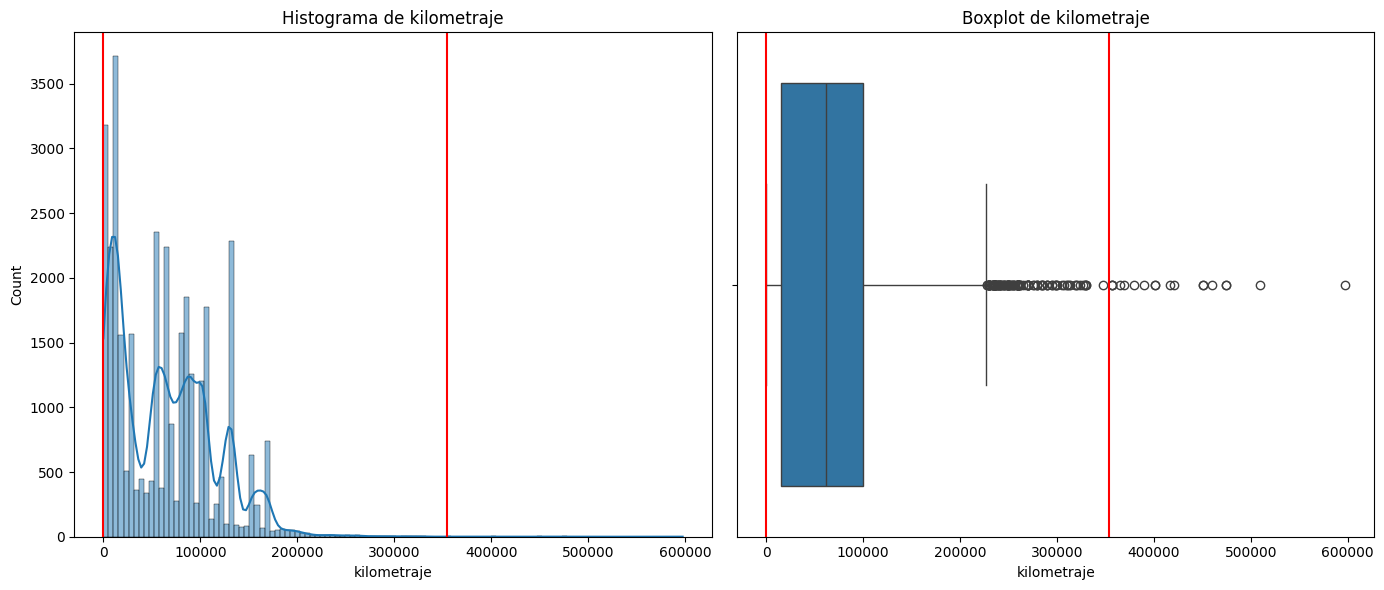

In [71]:
prueba_outliers("kilometraje", 'derecho', k=3)

-6.0 42.0
Se mantienen el 98.20% de los datos en la columna garantia después de eliminar los outliers.


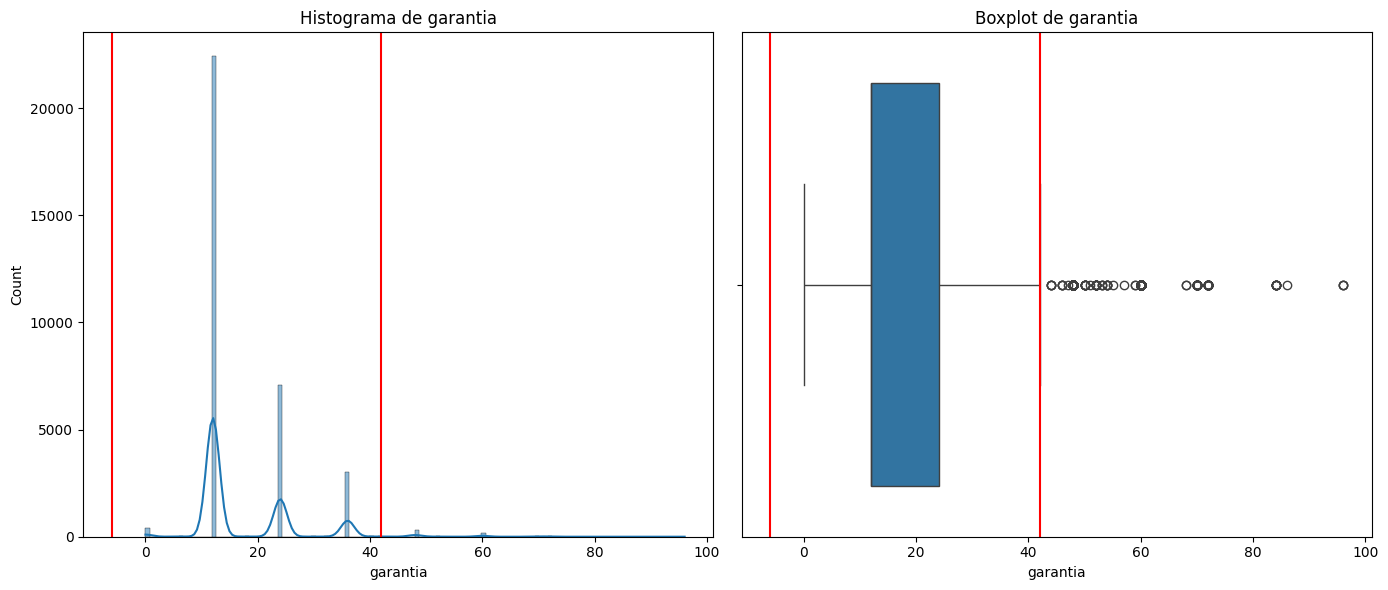

In [72]:
prueba_outliers("garantia", 'ambos', k=1.5)

900.0 253990.0
Se mantienen el 99.96% de los datos en la columna precio_contado después de eliminar los outliers.


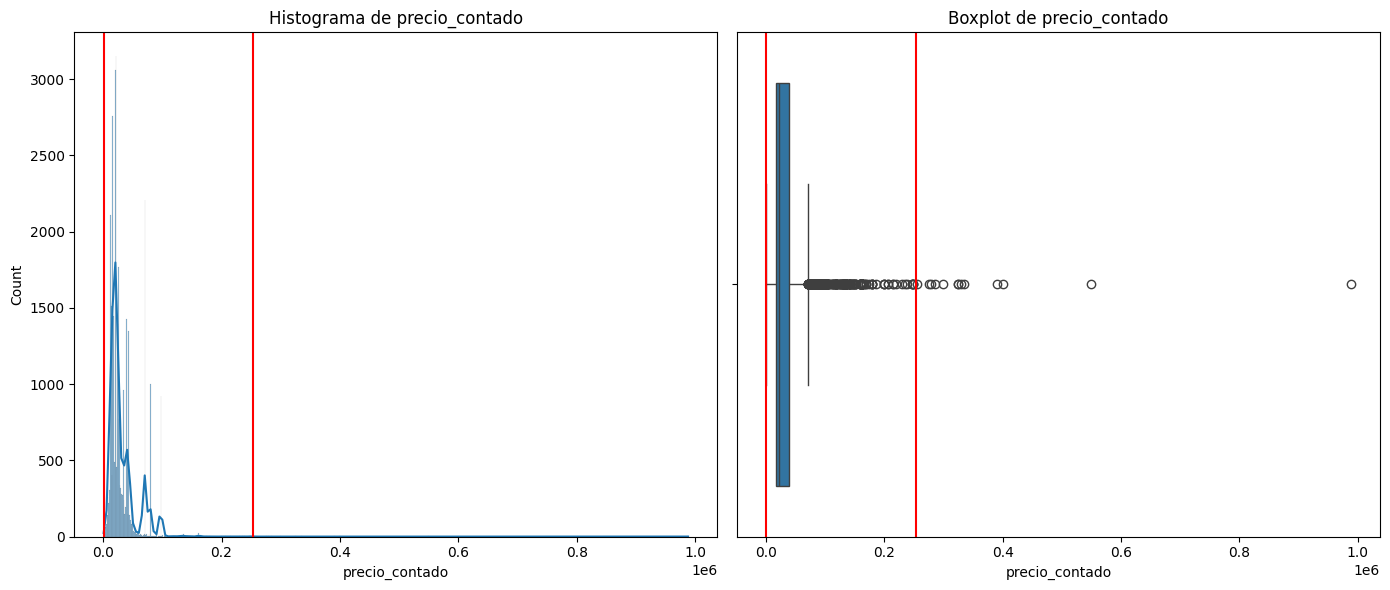

In [73]:
prueba_outliers("precio_contado", 'derecho', k=10)

7140.0 262983.0
Se mantienen el 99.97% de los datos en la columna precio_nuevo después de eliminar los outliers.


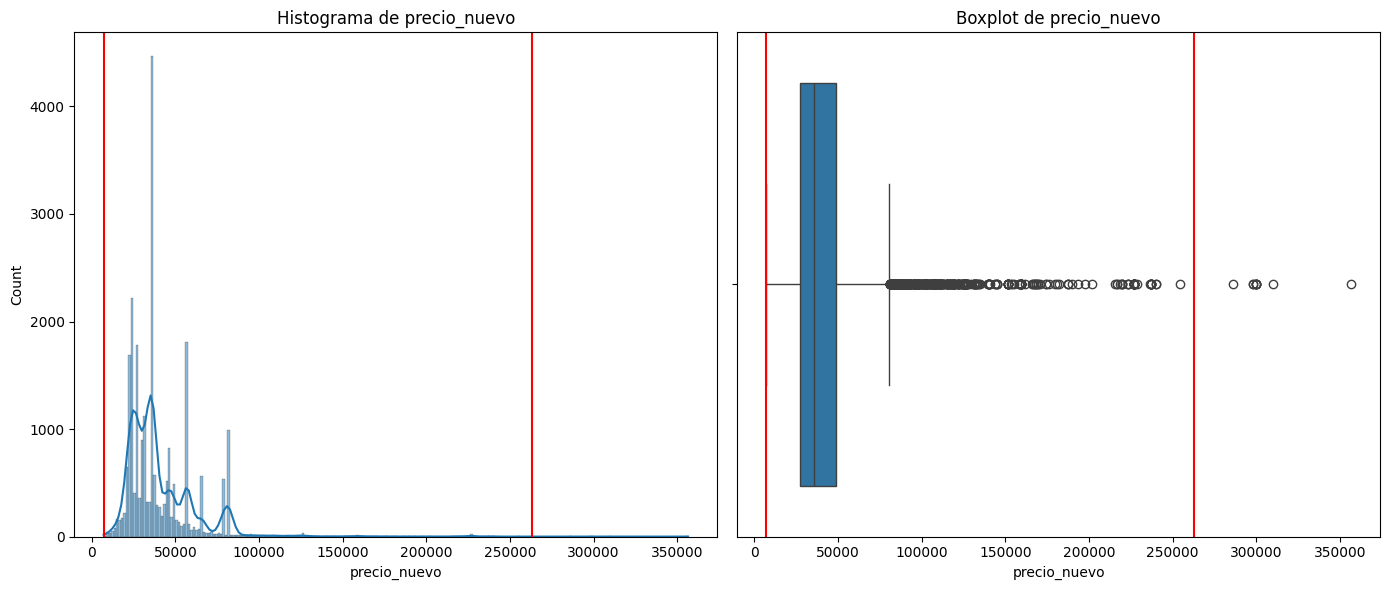

In [74]:
prueba_outliers("precio_nuevo", 'derecho', k=10)

3154.0 5575.0
Se mantienen el 99.92% de los datos en la columna largo después de eliminar los outliers.


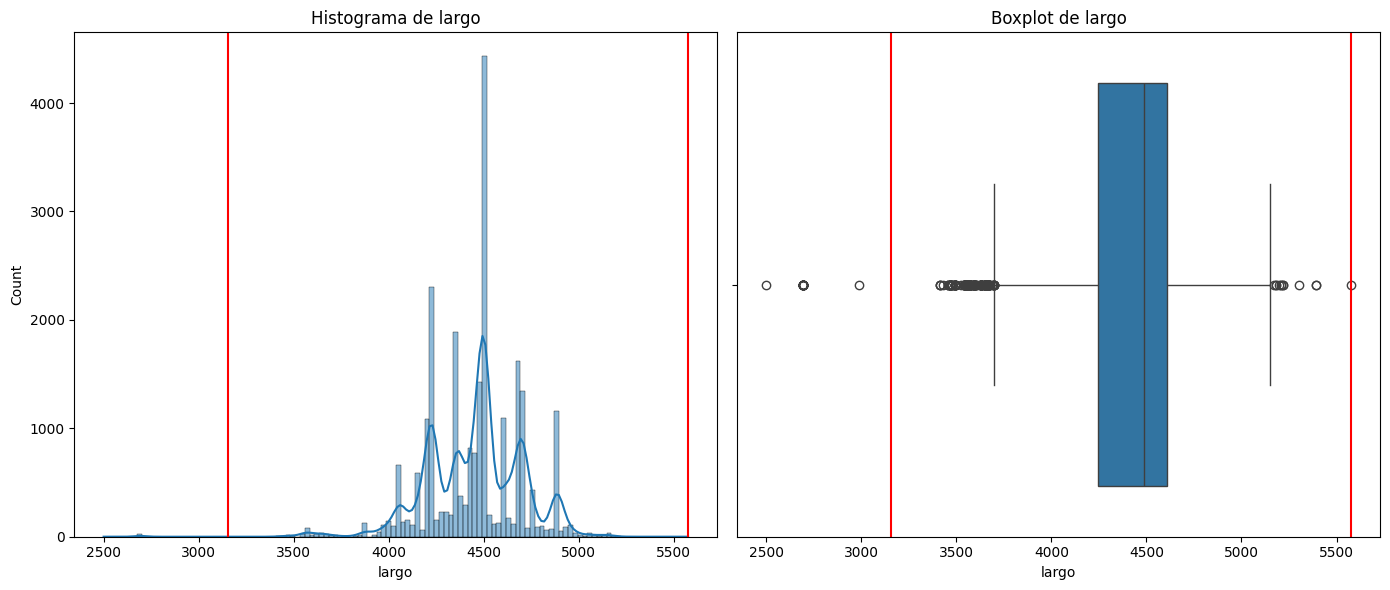

In [75]:
prueba_outliers("largo", 'izquierdo', k=3)

1596.0 2106.0
Se mantienen el 99.91% de los datos en la columna ancho después de eliminar los outliers.


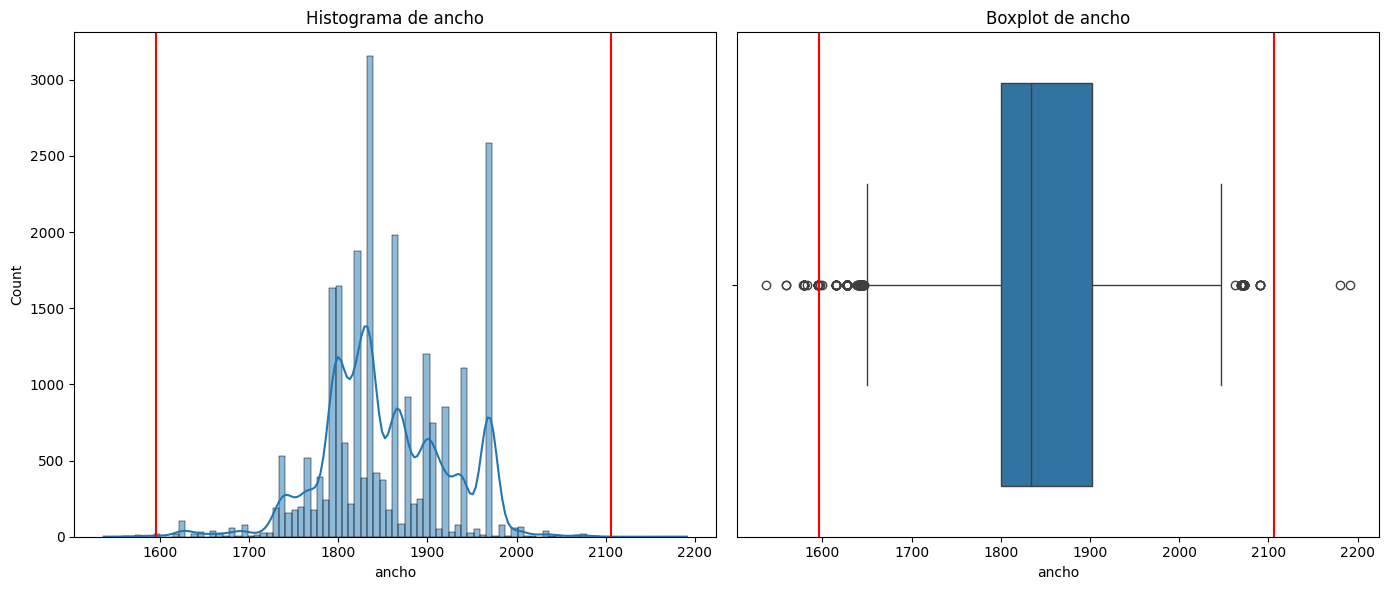

In [76]:
prueba_outliers("ancho", 'ambos', k=2)

1294.0 1894.0
Se mantienen el 99.84% de los datos en la columna alto después de eliminar los outliers.


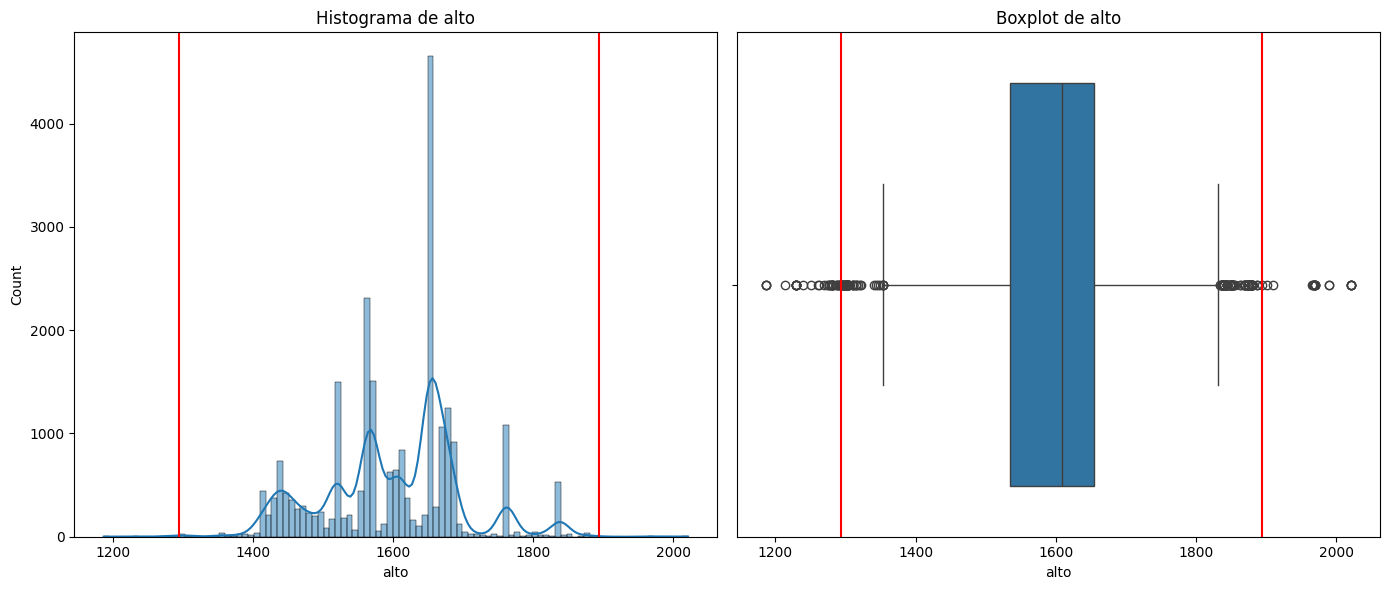

In [77]:
prueba_outliers("alto", 'ambos', k=2)

80.0 880.0
Se mantienen el 99.38% de los datos en la columna capacidad_maletero después de eliminar los outliers.


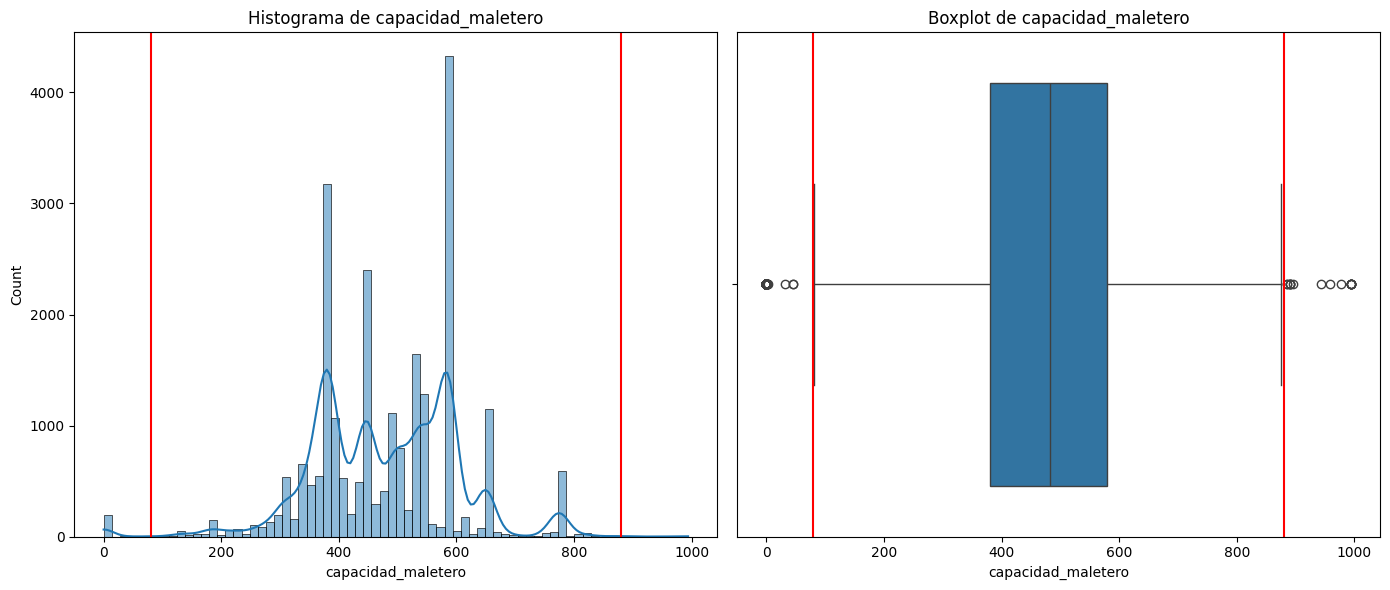

In [78]:
prueba_outliers("capacidad_maletero", 'ambos', k=1.5)

In [79]:
#No limpiamos esta

#prueba_outliers("num_plazas", 'ambos', k=1.5)

2.365999999999999 3.0030000000000006
Se mantienen el 99.02% de los datos en la columna batalla después de eliminar los outliers.


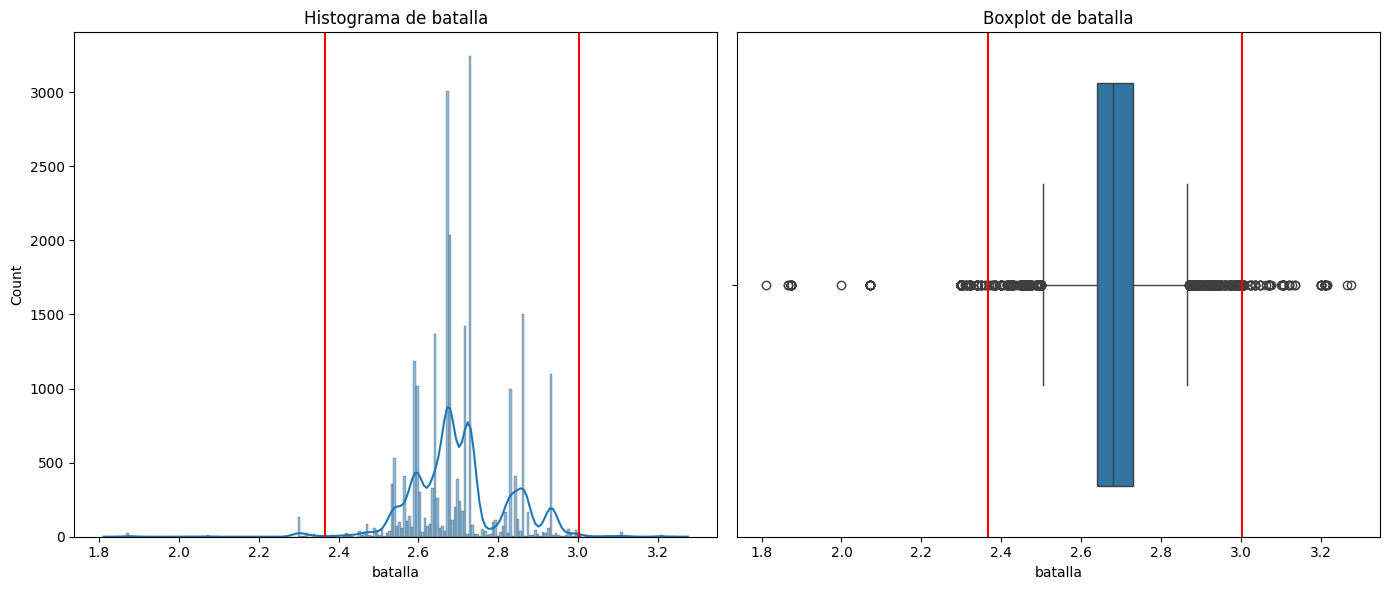

In [80]:
prueba_outliers("batalla", 'ambos', k=3)

In [81]:
#No se limpia

#prueba_outliers("num_puertas", 'izquierdo', k=1.5)

-7.6499999999999995 12.75
Se mantienen el 99.93% de los datos en la columna consumo_medio después de eliminar los outliers.


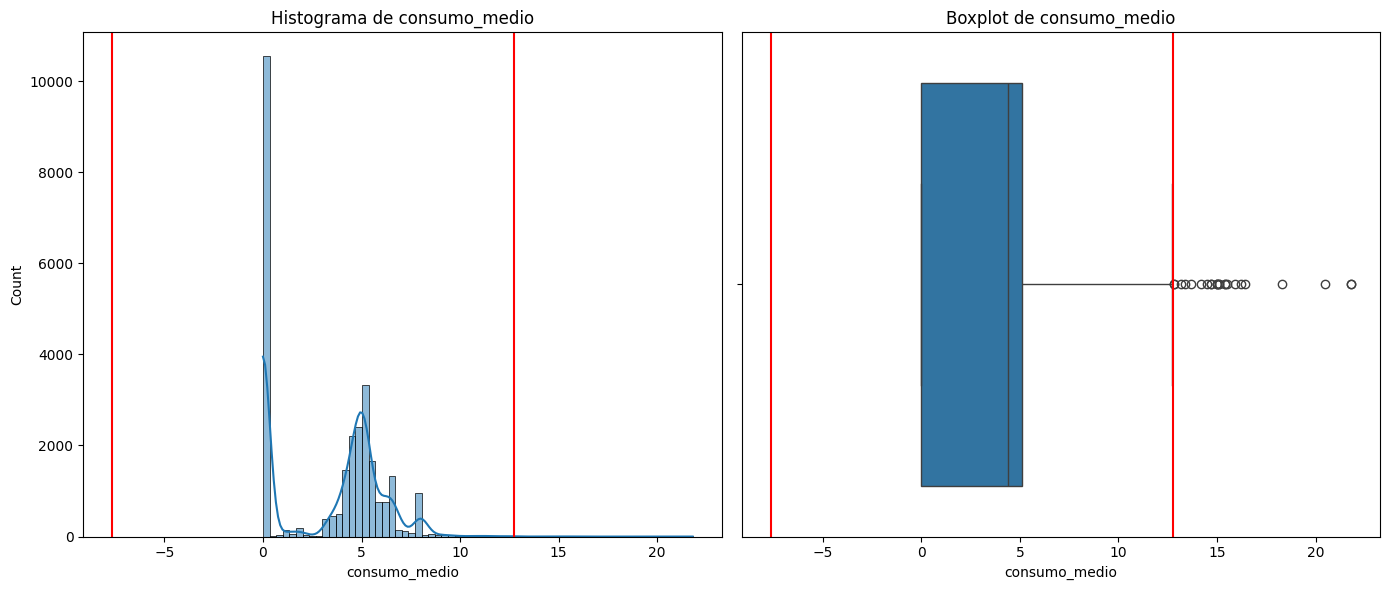

In [82]:
prueba_outliers("consumo_medio", 'ambos', k=1.5)

-6.8999999999999995 11.5
Se mantienen el 99.98% de los datos en la columna consumo_carretera después de eliminar los outliers.


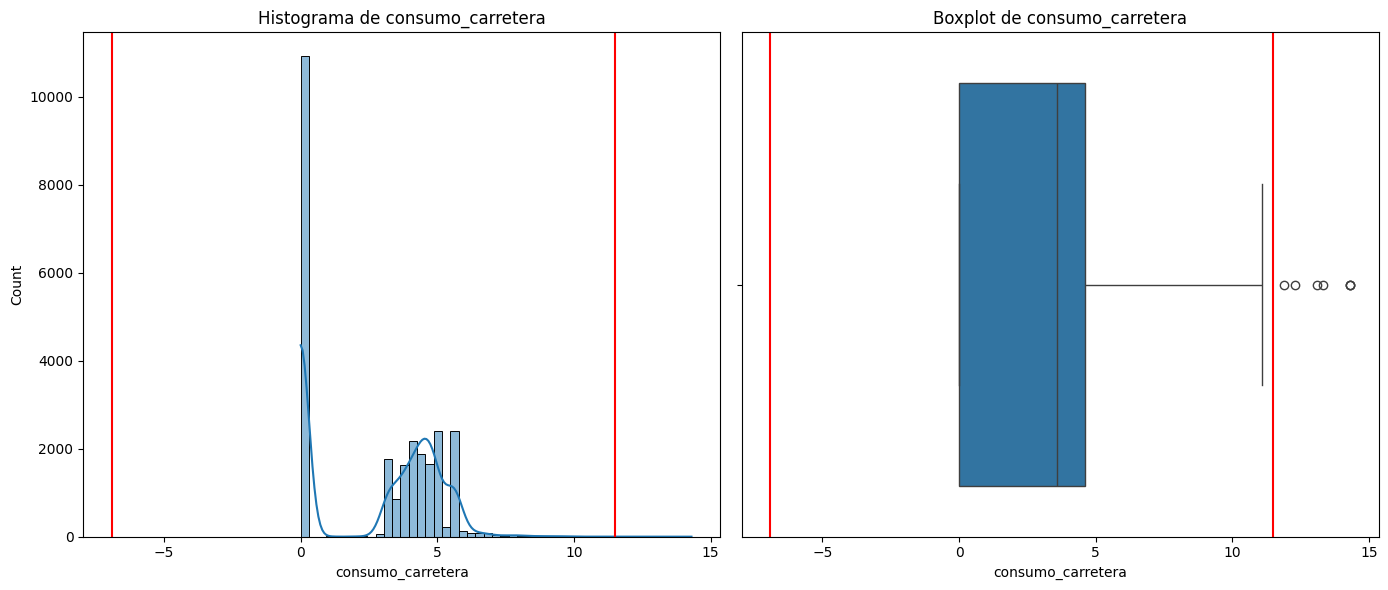

In [83]:
prueba_outliers("consumo_carretera", 'ambos', k=1.5)

-13.0 19.5
Se mantienen el 99.95% de los datos en la columna consumo_urbano después de eliminar los outliers.


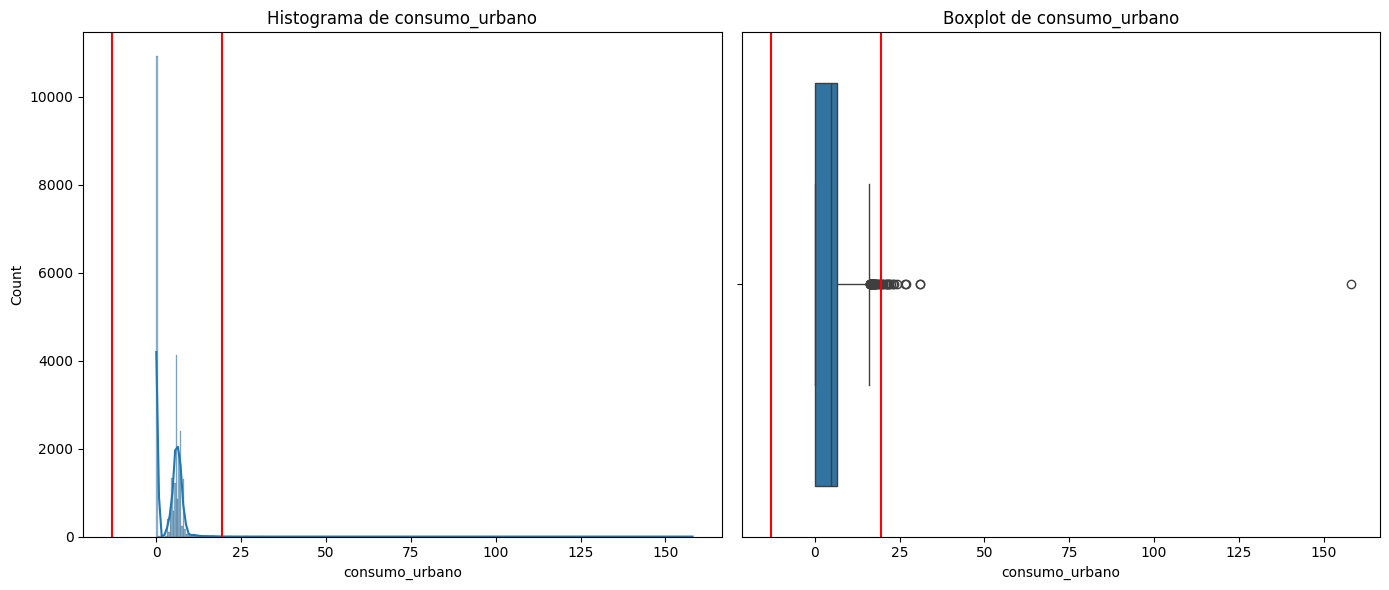

In [84]:
prueba_outliers("consumo_urbano", 'ambos', k=2)

19.5 85.5
Se mantienen el 93.64% de los datos en la columna deposito después de eliminar los outliers.


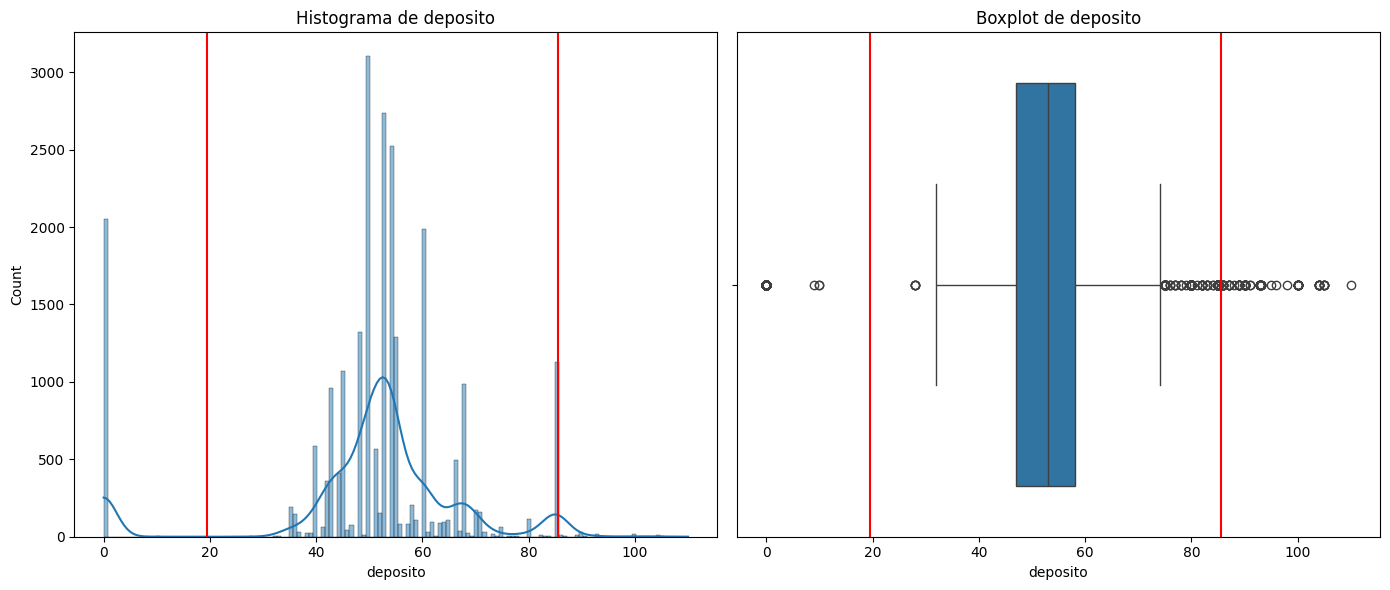

In [85]:
prueba_outliers("deposito", 'ambos', k=2.5)

1.0 3.6435000000000004
Se mantienen el 99.57% de los datos en la columna cilindrada después de eliminar los outliers.


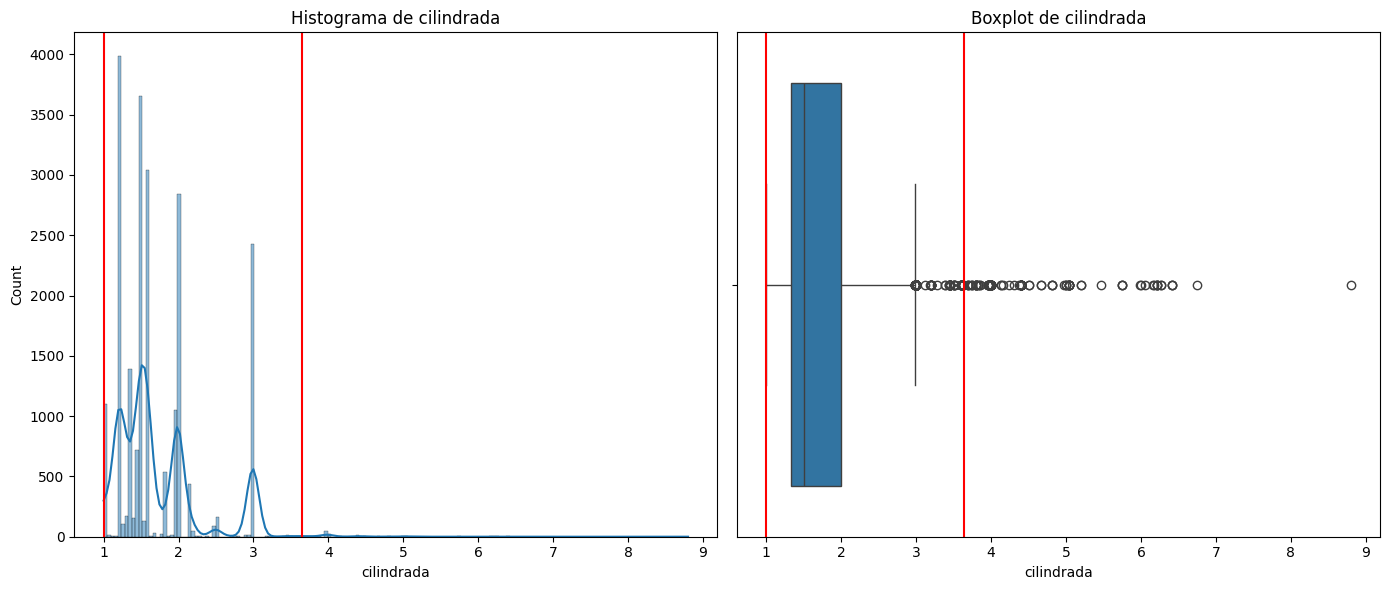

In [86]:
prueba_outliers("cilindrada", 'derecho', k=2.5)

3.0 11.0
Se mantienen el 93.05% de los datos en la columna num_marchas después de eliminar los outliers.


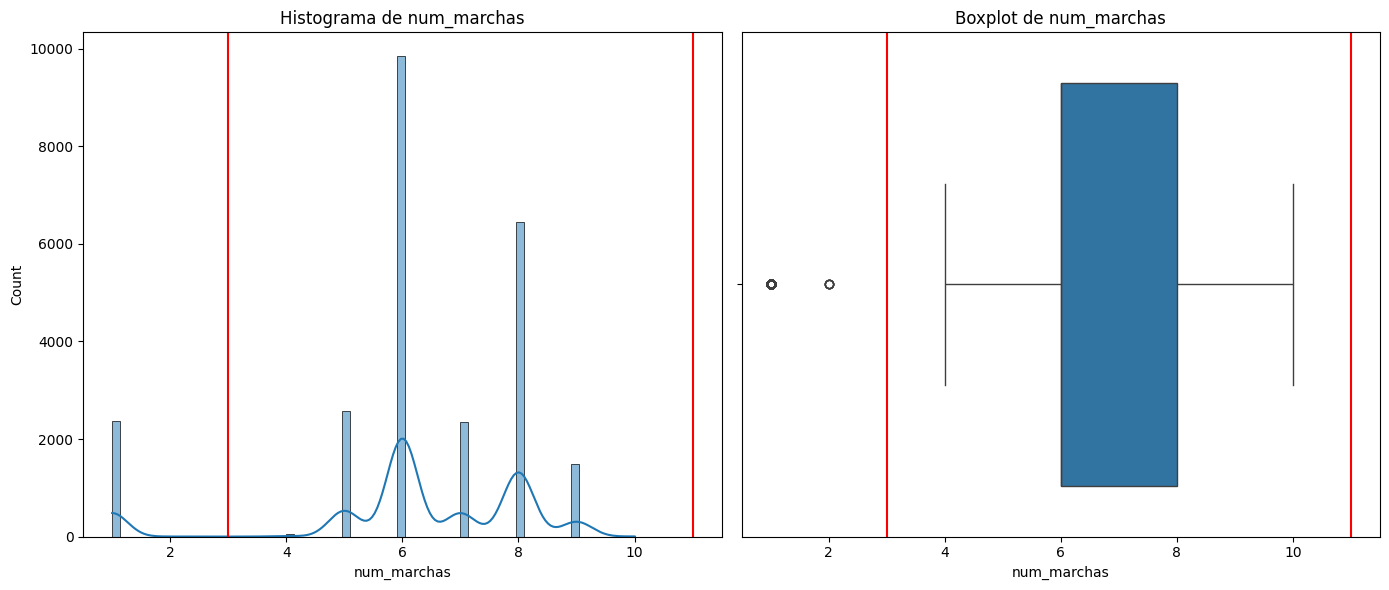

In [87]:
#No eliminamos. Hay que interpretar qué significan los coches con 1 ó 2 marchas

prueba_outliers("num_marchas", 'ambos', k=1.5)

-120.0 348.0
Se mantienen el 99.57% de los datos en la columna potencia_kw después de eliminar los outliers.


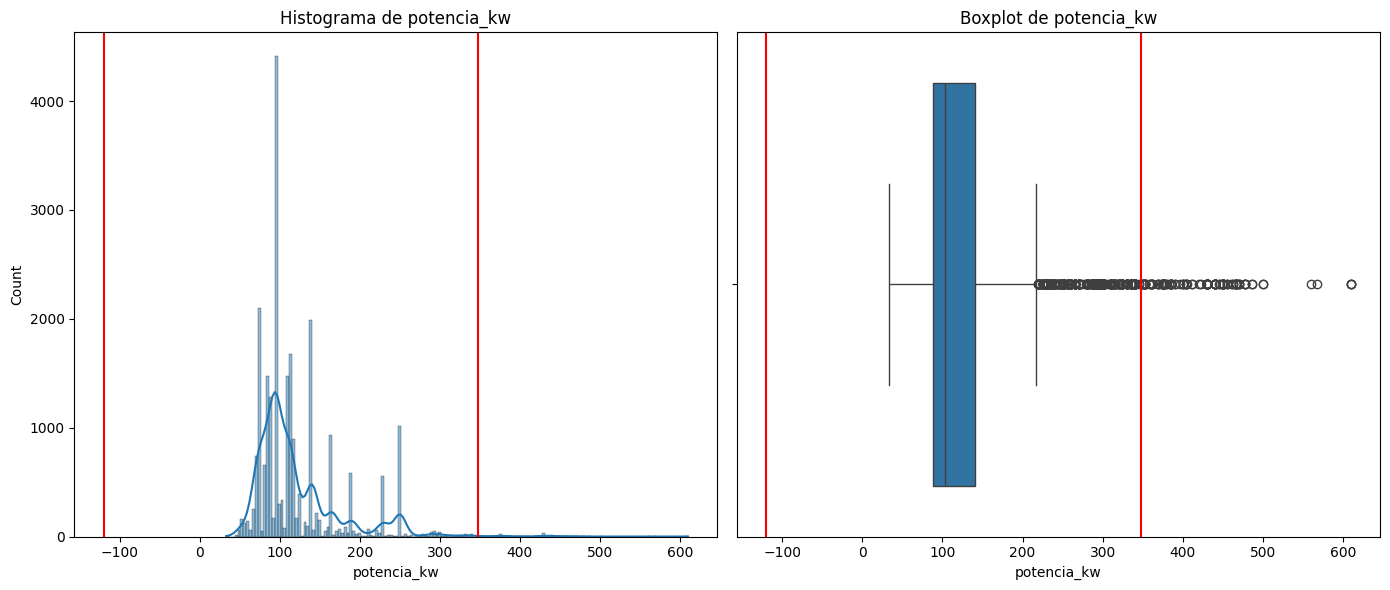

In [88]:
prueba_outliers("potencia_kw", 'ambos', k=4)

-264.0 591.0
Se mantienen el 99.84% de los datos en la columna potencia_cv después de eliminar los outliers.


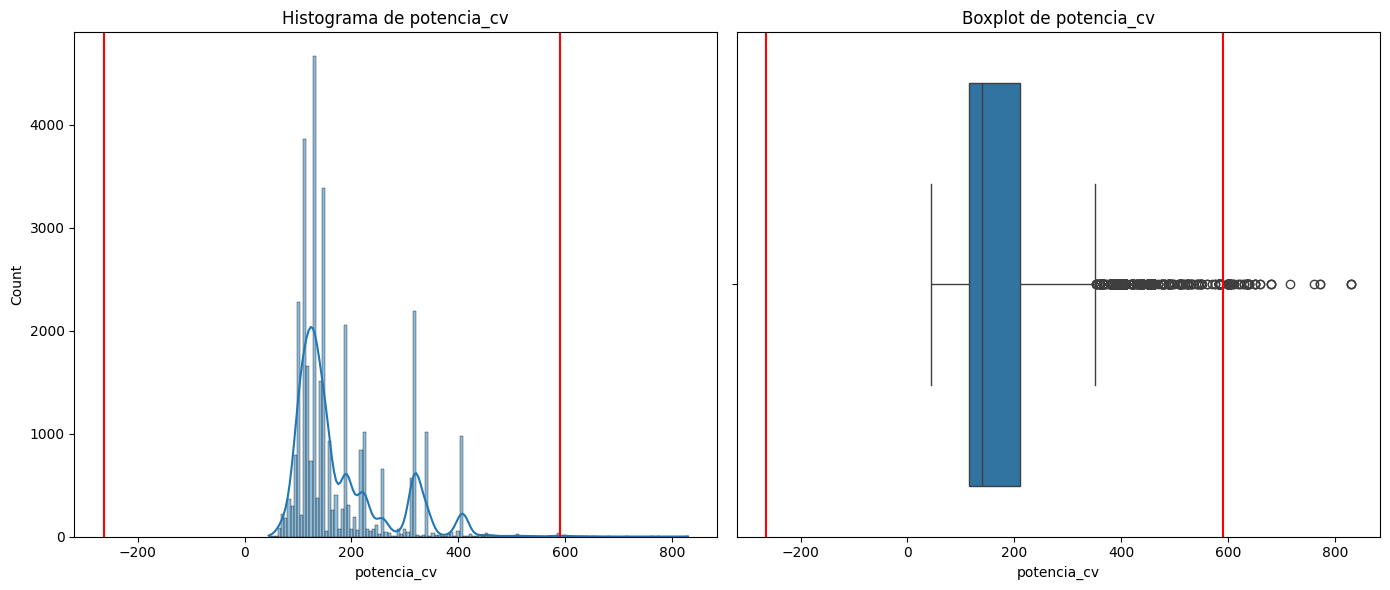

In [89]:
prueba_outliers("potencia_cv", 'ambos', k=4)

123.0 268.0
Se mantienen el 99.53% de los datos en la columna velocidad_max después de eliminar los outliers.


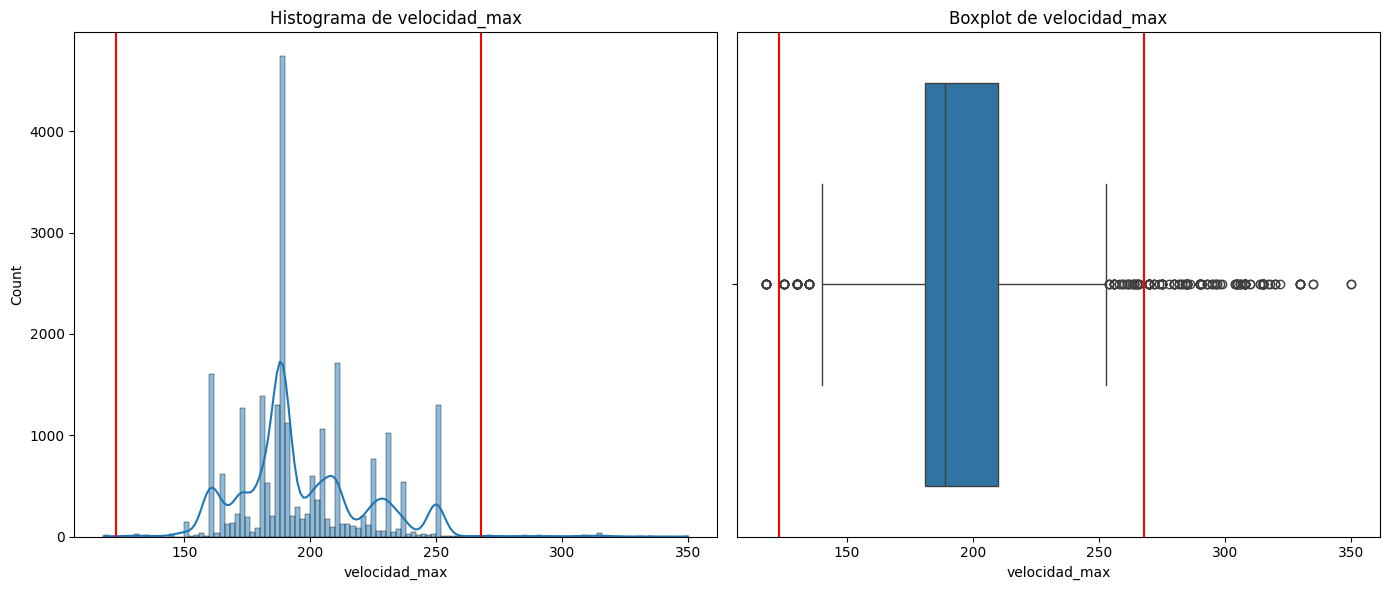

In [90]:
prueba_outliers("velocidad_max", 'ambos', k=2)

4.1999999999999975 15.200000000000003
Se mantienen el 98.88% de los datos en la columna aceleracion después de eliminar los outliers.


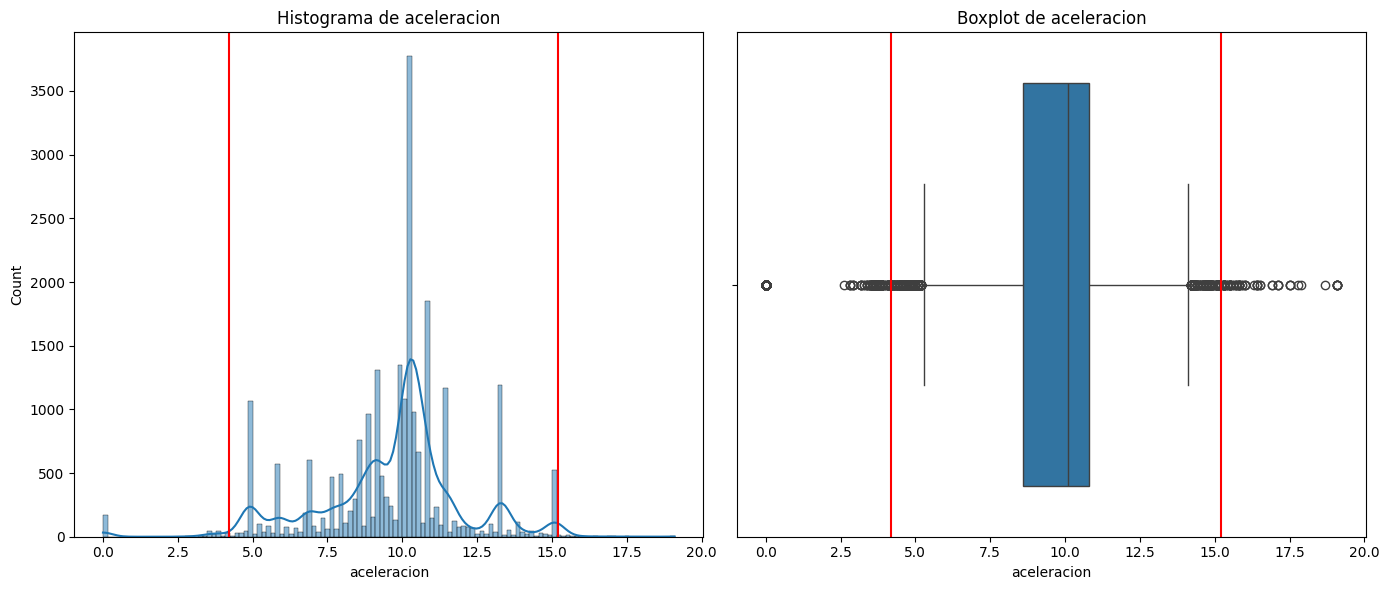

In [91]:
prueba_outliers("aceleracion", 'ambos', k=2)

In [92]:
#No tiene sentido quitar outliers en esta

#prueba_outliers("mes_matriculacion", 'ambos', k=1.5)

In [93]:
#No tiene sentido quitar outliers en esta

#prueba_outliers("ano_matriculacion", 'ambos', k=1.5)

13.0 230.0
Se mantienen el 99.69% de los datos en la columna co2 después de eliminar los outliers.


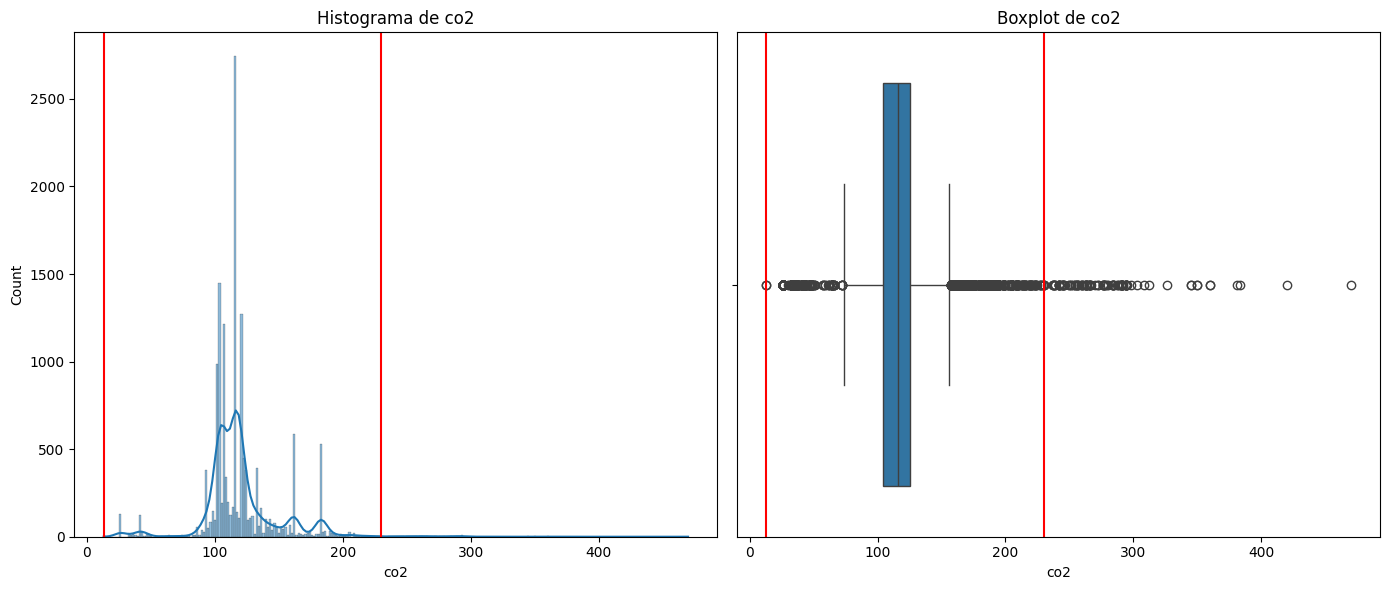

In [94]:
prueba_outliers("co2", 'derecho', k=5)

In [95]:
#No tiene sentido quitar outliers en esta

#prueba_outliers("num_cilindros", 'ambos', k=1.5)

In [96]:
for columna in continuous_columns:
    df [columna] = df_copia[columna]


In [97]:
df.shape

(34062, 36)

## MAPA COROPLÉTICO ##

In [99]:
df.columns

Index(['id_provincia', 'kilometraje', 'id_concesionario',
       'id_distintivo_ambiental', 'garantia', 'precio_contado', 'precio_nuevo',
       'largo', 'ancho', 'alto', 'capacidad_maletero', 'id_carroceria',
       'num_plazas', 'batalla', 'peso', 'num_puertas', 'consumo_medio',
       'consumo_carretera', 'consumo_urbano', 'deposito', 'combustible',
       'cilindrada', 'num_marchas', 'potencia_kw', 'potencia_cv', 'par',
       'velocidad_max', 'aceleracion', 'mes_matriculacion',
       'ano_matriculacion', 'co2', 'num_cilindros', 'id_sobrealimentacion',
       'id_marca', 'id_modelo', 'id_tipo_cambio'],
      dtype='object')

In [100]:
conversion_inversa = {v: k for k, v in conversion_provincias.items()}

#Más adelante hay que droppear esta columna. Es la conversión inversa a nombres de provincia
df['nombre_provincia'] = df['id_provincia'].map(conversion_inversa)

datos_agrupados = df.groupby('id_provincia').agg(
    cantidad_coches=('id_provincia', 'size'),
    media_precio=('precio_contado', 'mean')
).reset_index()

datos_agrupados['nombre_provincia'] = datos_agrupados['id_provincia'].map(conversion_inversa)

cantidad_coches_dict = dict(zip(datos_agrupados['nombre_provincia'], datos_agrupados['cantidad_coches']))
media_precio_dict = dict(zip(datos_agrupados['nombre_provincia'], datos_agrupados['media_precio']))

In [101]:
coordenadas = {
    "Álava": (42.8467, -2.6716),
    "Albacete": (38.9943, -1.8564),
    "Alicante": (38.3452, -0.4810),
    "Almería": (36.8340, -2.4637),
    "Asturias": (43.3619, -5.8494),
    "Ávila": (40.6565, -4.7003),
    "Badajoz": (38.8794, -6.9706),
    "Islas Baleares": (39.5696, 2.6502),
    "Barcelona": (41.3851, 2.1734),
    "Burgos": (42.3439, -3.6969),
    "Cáceres": (39.4763, -6.3722),
    "Cádiz": (36.5271, -6.2886),
    "Cantabria": (43.4623, -3.8099),
    "Castellón": (39.9864, -0.0513),
    "Ciudad Real": (38.9848, -3.9270),
    "Córdoba": (37.8882, -4.7794),
    "La Coruña": (43.3623, -8.4115),
    "Cuenca": (40.0704, -2.1374),
    "Girona": (41.9794, 2.8214),
    "Granada": (37.1773, -3.5986),
    "Guadalajara": (40.6333, -3.1669),
    "Guipúzcoa": (43.3183, -1.9812),
    "Huelva": (37.2614, -6.9447),
    "Huesca": (42.1401, -0.4089),
    "Jaén": (37.7796, -3.7849),
    "León": (42.5987, -5.5671),
    "Lleida": (41.6176, 0.6200),
    "La Rioja": (42.4627, -2.4449),
    "Lugo": (43.0120, -7.5559),
    "Madrid": (40.4168, -3.7038),
    "Málaga": (36.7213, -4.4214),
    "Murcia": (37.9922, -1.1307),
    "Navarra": (42.8125, -1.6458),
    "Orense": (42.3358, -7.8639),
    "Palencia": (42.0095, -4.5270),
    "Las Palmas": (28.1235, -15.4363),
    "Pontevedra": (42.4310, -8.6444),
    "Salamanca": (40.9701, -5.6635),
    "Santa Cruz de Tenerife": (28.4636, -16.2518),
    "Segovia": (40.9429, -4.1088),
    "Sevilla": (37.3891, -5.9845),
    "Soria": (41.7636, -2.4645),
    "Tarragona": (41.1189, 1.2445),
    "Teruel": (40.3440, -1.1069),
    "Toledo": (39.8628, -4.0273),
    "Valencia": (39.4699, -0.3763),
    "Valladolid": (41.6523, -4.7245),
    "Vizcaya": (43.2630, -2.9350),
    "Zamora": (41.5033, -5.7446),
    "Zaragoza": (41.6488, -0.8891),
    "Ceuta": (35.8894, -5.3198),
    "Melilla": (35.2923, -2.9381)}

In [102]:
datos_agrupados.head()

id_provincia  cantidad_coches  media_precio nombre_provincia
0             1            15951  33078.486045           Madrid
1             2              179  27737.142857          Sevilla
2             3               50  35664.660000          Córdoba
3             4              406  32845.733503         Valencia
4             5              701  27205.856725           Málaga

In [103]:
lista_provincias = [provincia for provincia in datos_agrupados['nombre_provincia'].unique()]

In [104]:
m_cantidad_coches = folium.Map(location=[40.4168, -3.7038], zoom_start=6)

for i, row in datos_agrupados.iterrows():
    provincia = row['nombre_provincia']
    cantidad = row['cantidad_coches']
    
    if provincia in coordenadas:
        folium.Circle(
            location=coordenadas[provincia],
            radius=cantidad * 10,
            color='blue',
            fill=True,
            fill_color='YlGnBu',
            fill_opacity=0.7,
            popup=f"{provincia}: {cantidad} coches"
        ).add_to(m_cantidad_coches)

m_cantidad_coches

In [105]:
m_media_precio = folium.Map(location=[40.4168, -3.7038], zoom_start=6)

for i, row in datos_agrupados.iterrows():
    provincia = row['nombre_provincia']
    media_precio = row['media_precio']
    
    if provincia in coordenadas:
        folium.Circle(
            location=coordenadas[provincia],
            radius=media_precio / 10,
            color='red',
            fill=True,
            fill_color='YlOrRd',
            fill_opacity=0.7,
            popup=f"{provincia}: Precio medio {media_precio:.2f}€"
        ).add_to(m_media_precio)

m_media_precio.save("media_precio_provincias.html")
m_media_precio

In [107]:
mapa_cantidad_coches = folium.Map(location=[40.4168, -3.7038], zoom_start=6)

# Mapa coroplético para la cantidad de coches usando el diccionario
Choropleth(
    geo_data='../bin/Límites de las Provincias de España.geojson',
    name="choropleth",
    data=cantidad_coches_dict,
    key_on="feature.properties.nombre_provincia",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Cantidad de coches por provincia"
).add_to(mapa_cantidad_coches)

mapa_cantidad_coches

AttributeError: 'NoneType' object has no attribute 'get'